In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from itertools import cycle
from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import SelectFromModel, RFECV

# Exploratory Data Analysis

In [7]:
df_tr_lbl = pd.read_csv('/content/train.csv')
df_tr_lbl.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      sd15  sd16      sd17  sd18  sd19      sd20      sd21  ttf  \
0  14.62  ...  0.000000   0.0  0.000000   0.0   0.0  0.000000  0.000000  191   
1  14.62  ...  0.008697   0.0  0.000000   0.0   0.0  0.042426  0.003253  190   
2  14.62  ...  0.007640   0.0  1.154701   0.0   0.0  0.055076  0.044573  189   
3  14.62  ...  0.028117   0.0  1.000000   0.0   0.0  0.076322  0.037977  188   
4  14.62  ...  0.025953   0.0  1.095445   0.0   0.0  0.073621  0.033498  187   

   label_bnc  label_mcc  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 71 columns]

In [8]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

<Axes: title={'center': 'Features Standard Deviation'}>

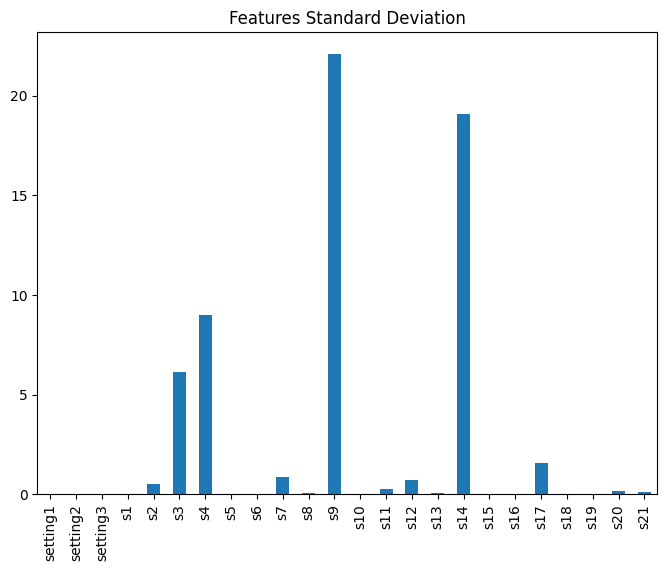

In [9]:
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

<Axes: title={'center': 'Features Standard Deviation (log)'}>

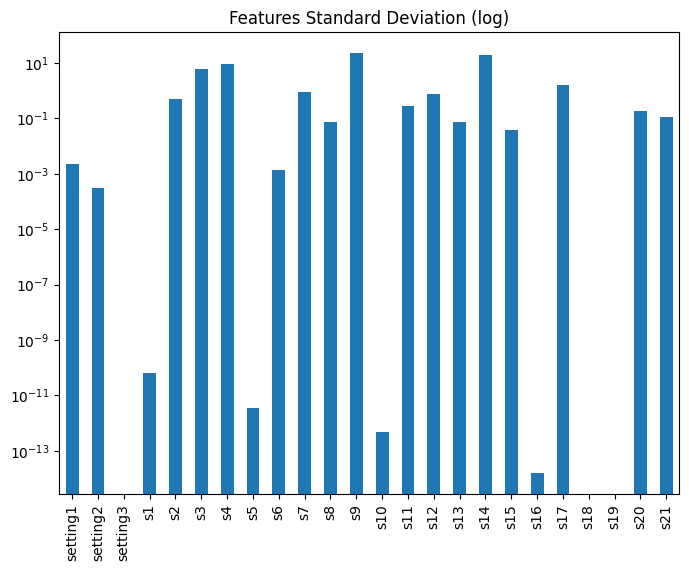

In [10]:
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), logy=True,title="Features Standard Deviation (log)")

In [11]:
# get ordered list of top variance features:

featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
setting3    0.000000e+00
s19         0.000000e+00
s18         0.000000e+00
dtype: float64

In [12]:
# get ordered list features correlation with regression label ttf

df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -1.440037e-16
s5         -1.440037e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [13]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection

low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

setting3            s1           s10      s18      s19           s16  \
count   20631.0  2.063100e+04  2.063100e+04  20631.0  20631.0  2.063100e+04   
mean      100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
std         0.0  6.537152e-11  4.660829e-13      0.0      0.0  1.556432e-14   
min       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
25%       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
50%       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
75%       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
max       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   

                 s5      setting2      setting1  
count  2.063100e+04  20631.000000  20631.000000  
mean   1.462000e+01      0.000002     -0.000009  
std    3.394700e-12      0.000293      0.002187  
min    1.462000e+01     -0.000600     -0.008700  
25%    1.462000e+01     -0.000200     -0.001500  
50%    1.462000e+01      0.000000      0.000000  
75%    1.462000e+01      0.000300      0.001500  
max    1.462000e+01      0.000600      0.008700

In [14]:
# list of features having high correlation with regression label ttf

correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

s12            s7           s21           s20            s6  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     521.413470    553.367711     23.289705     38.816271     21.609803   
std        0.737553      0.885092      0.108251      0.180746      0.001389   
min      518.690000    549.850000     22.894200     38.140000     21.600000   
25%      520.960000    552.810000     23.221800     38.700000     21.610000   
50%      521.480000    553.440000     23.297900     38.830000     21.610000   
75%      521.950000    554.010000     23.366800     38.950000     21.610000   
max      523.380000    556.060000     23.618400     39.430000     21.610000   

                s14            s9           s13            s8            s3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    8143.752722   9065.242941   2388.096152   2388.096652   1590.523119   
std       19.076176     22.082880      0.071919      0.070985      6.131150   
min     8099.940000   9021.730000   2387.880000   2387.900000   1571.040000   
25%     8133.245000   9053.100000   2388.040000   2388.050000   1586.260000   
50%     8140.540000   9060.660000   2388.090000   2388.090000   1590.100000   
75%     8148.310000   9069.420000   2388.140000   2388.140000   1594.380000   
max     8293.720000   9244.590000   2388.560000   2388.560000   1616.910000   

                s17            s2           s15            s4           s11  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean     393.210654    642.680934      8.442146   1408.933782     47.541168  
std        1.548763      0.500053      0.037505      9.000605      0.267087  
min      388.000000    641.210000      8.324900   1382.250000     46.850000  
25%      392.000000    642.325000      8.414900   1402.360000     47.350000  
50%      393.000000    642.640000      8.438900   1408.040000     47.510000  
75%      394.000000    643.000000      8.465600   1414.555000     47.700000  
max      400.000000    644.530000      8.584800   1441.490000     48.530000

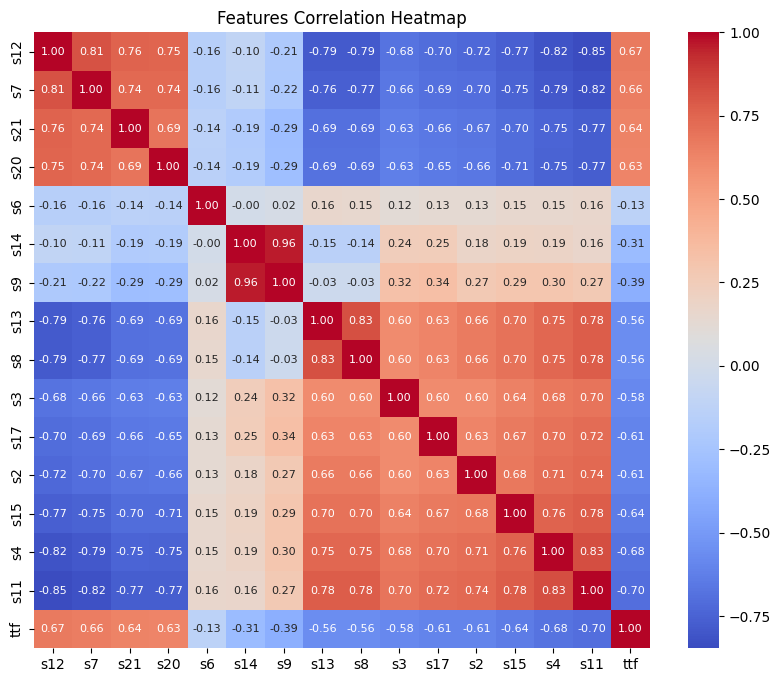

In [15]:
correl_featurs_lbl = correl_featurs + ['ttf']
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
fig = plt.figure(figsize=(10, 8))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl, cmap='coolwarm')
plt.title('Features Correlation Heatmap')
plt.show()

array([[<Axes: xlabel='s12', ylabel='s12'>,
        <Axes: xlabel='s7', ylabel='s12'>,
        <Axes: xlabel='s21', ylabel='s12'>,
        <Axes: xlabel='s20', ylabel='s12'>,
        <Axes: xlabel='s6', ylabel='s12'>,
        <Axes: xlabel='s14', ylabel='s12'>,
        <Axes: xlabel='s9', ylabel='s12'>,
        <Axes: xlabel='s13', ylabel='s12'>,
        <Axes: xlabel='s8', ylabel='s12'>,
        <Axes: xlabel='s3', ylabel='s12'>,
        <Axes: xlabel='s17', ylabel='s12'>,
        <Axes: xlabel='s2', ylabel='s12'>,
        <Axes: xlabel='s15', ylabel='s12'>,
        <Axes: xlabel='s4', ylabel='s12'>,
        <Axes: xlabel='s11', ylabel='s12'>,
        <Axes: xlabel='ttf', ylabel='s12'>],
       [<Axes: xlabel='s12', ylabel='s7'>,
        <Axes: xlabel='s7', ylabel='s7'>,
        <Axes: xlabel='s21', ylabel='s7'>,
        <Axes: xlabel='s20', ylabel='s7'>,
        <Axes: xlabel='s6', ylabel='s7'>,
        <Axes: xlabel='s14', ylabel='s7'>,
        <Axes: xlabel='s9', ylabel='s7'>,
    

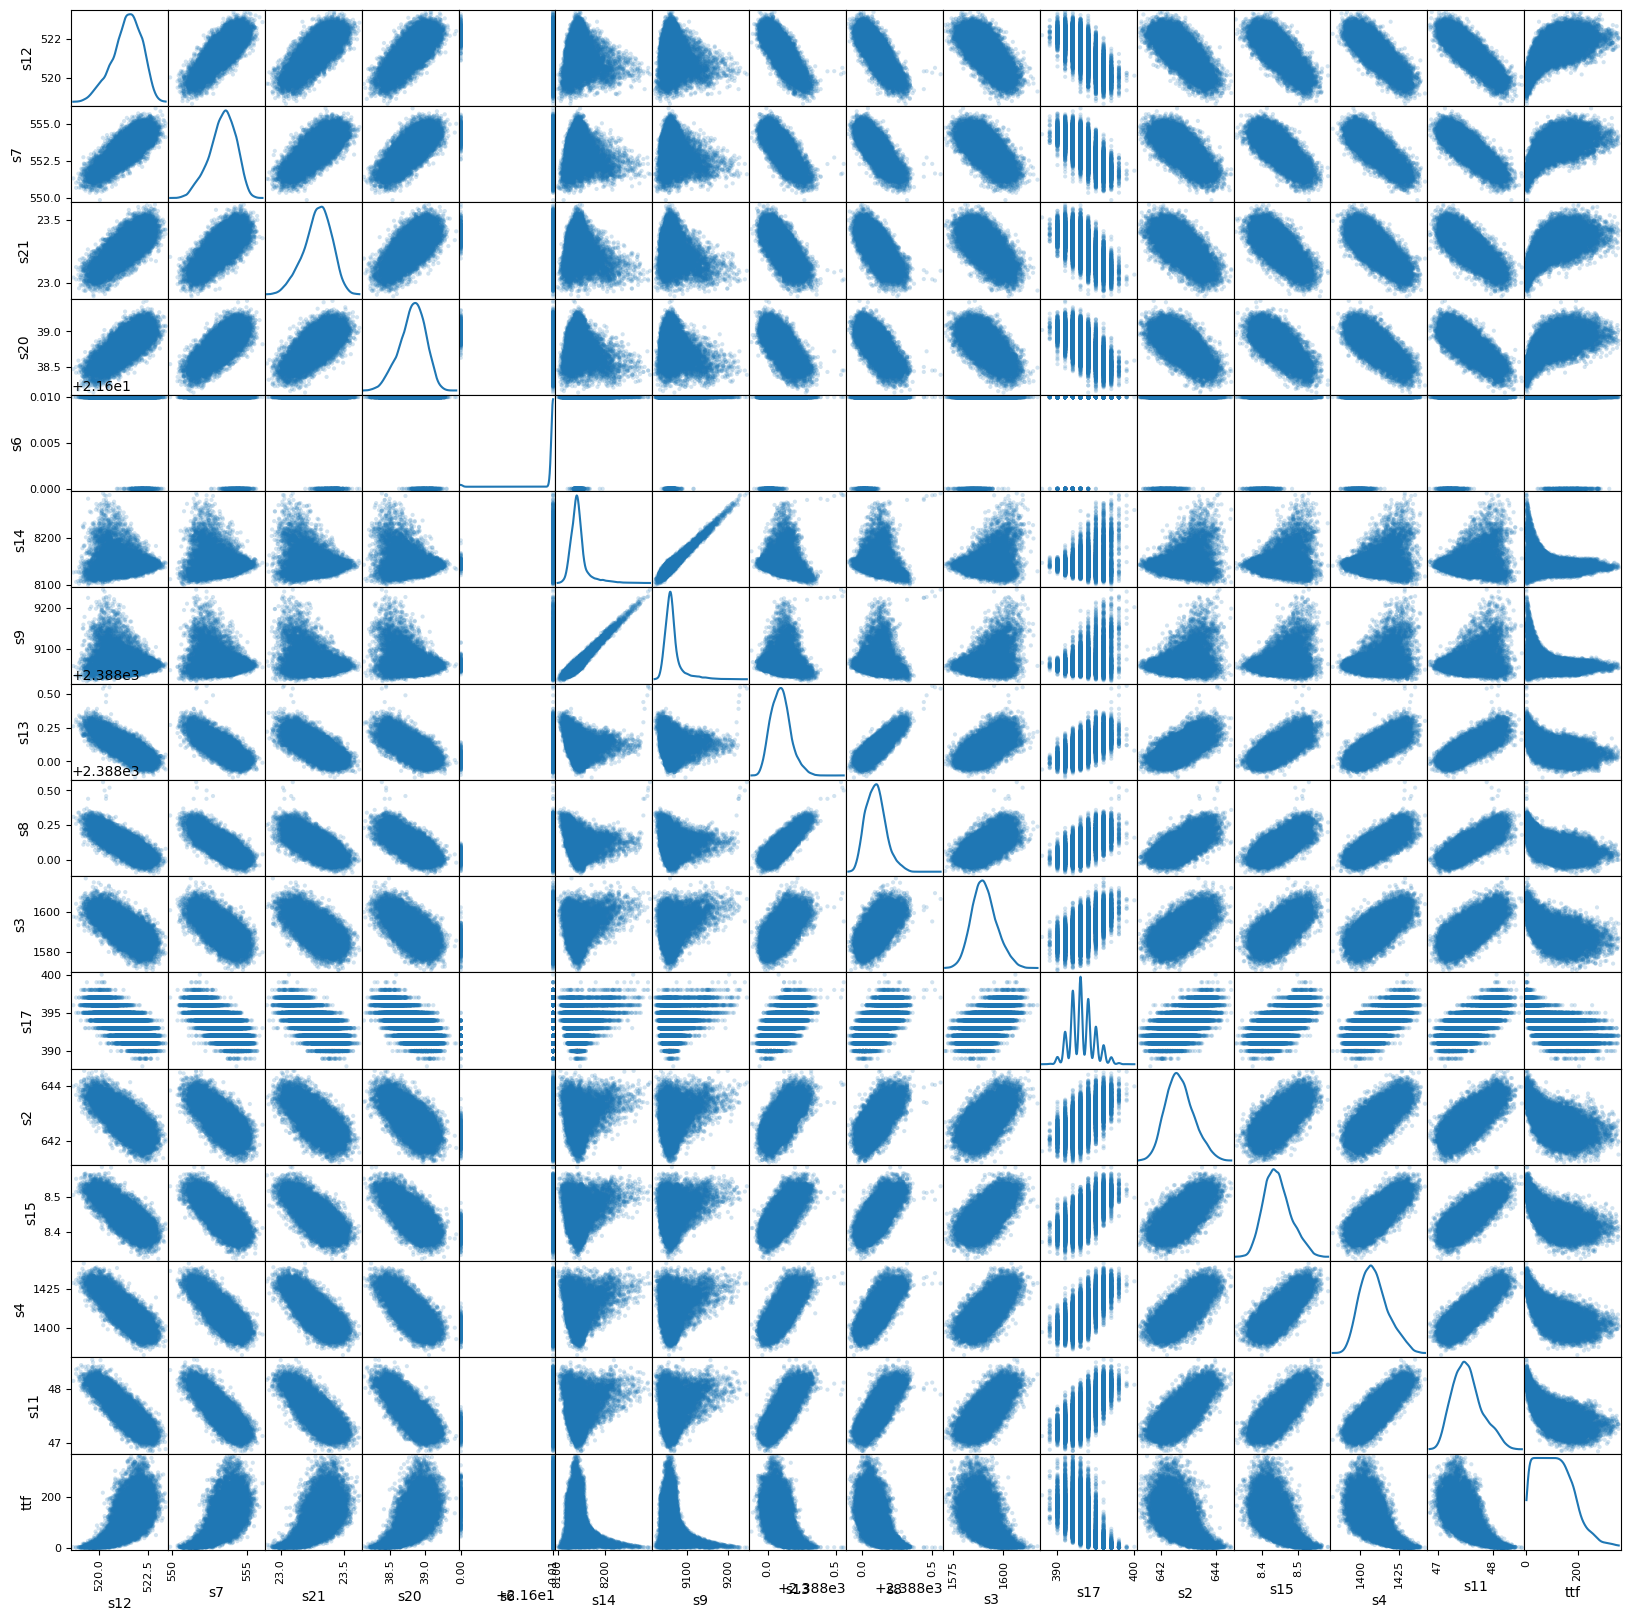

In [16]:
#create scatter matrix to disply relatiohships and distribution among features and regression label

scatter_matrix(df_tr_lbl[correl_featurs_lbl], alpha=0.2, figsize=(20, 20), diagonal='kde')

In [17]:
def explore_col(s, e):

    """Plot 4 main graphs for a single feature.

        plot1: histogram
        plot2: boxplot
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf

    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots

    """

    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221)
    sub1.set_title(s +' histogram')
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])

    #np.random.seed(12345)

    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)

    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])

    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

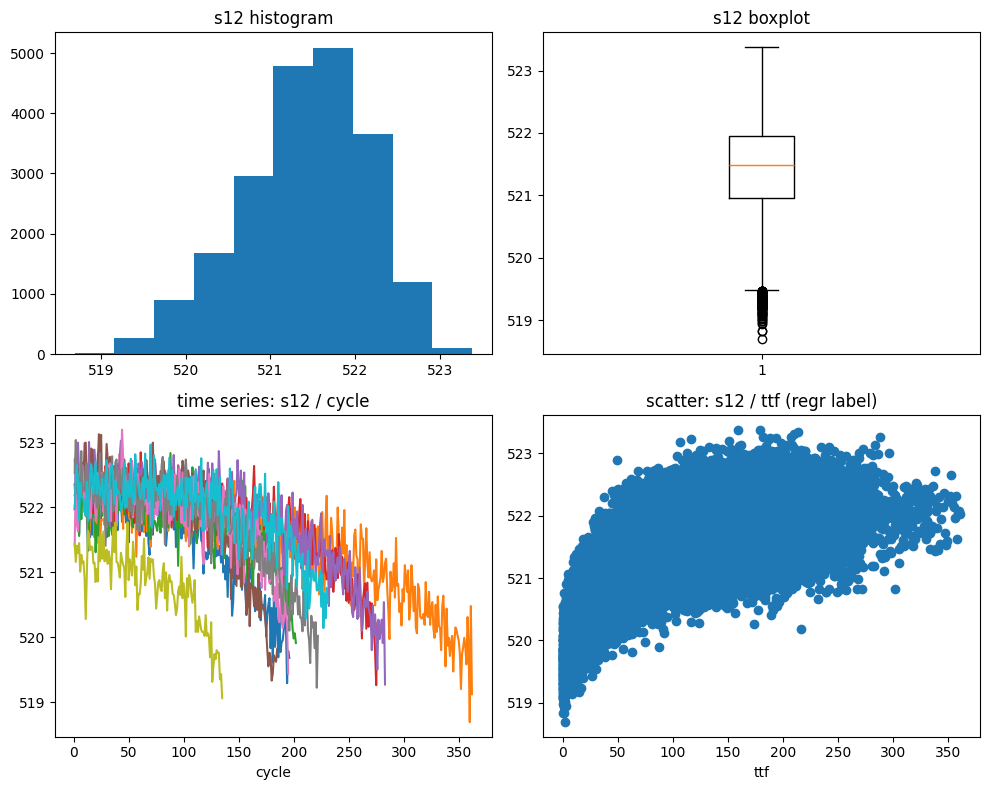

In [18]:
explore_col("s12", 10)

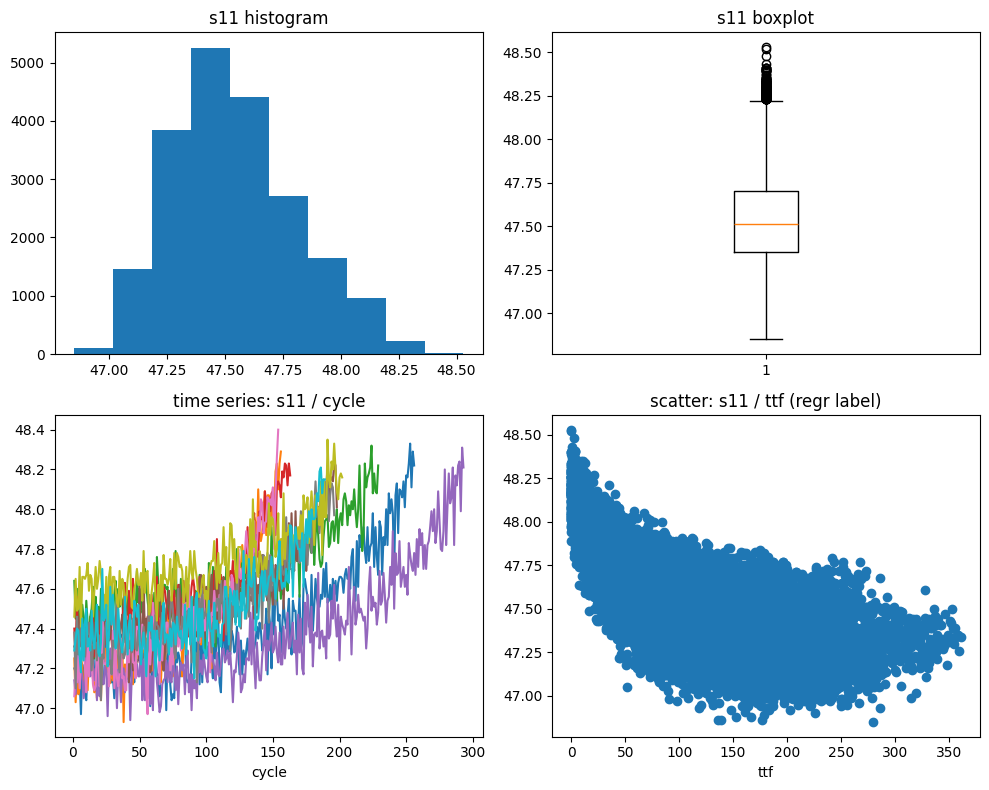

In [19]:
explore_col("s11", 10)

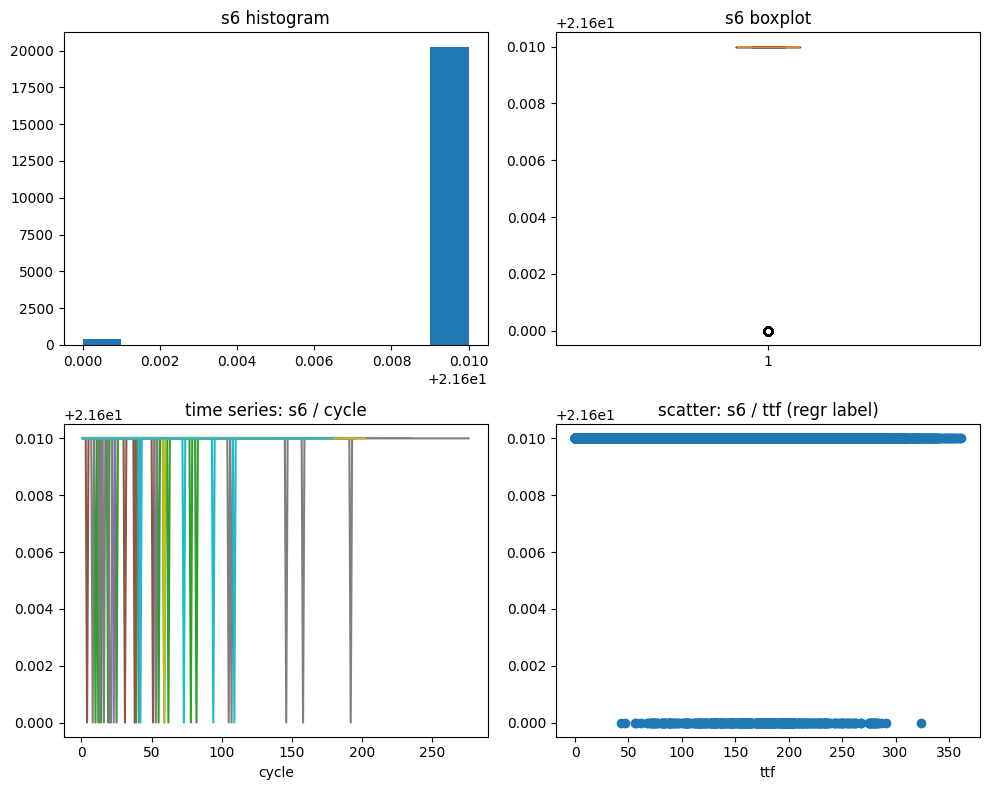

In [20]:
explore_col("s6", 10)

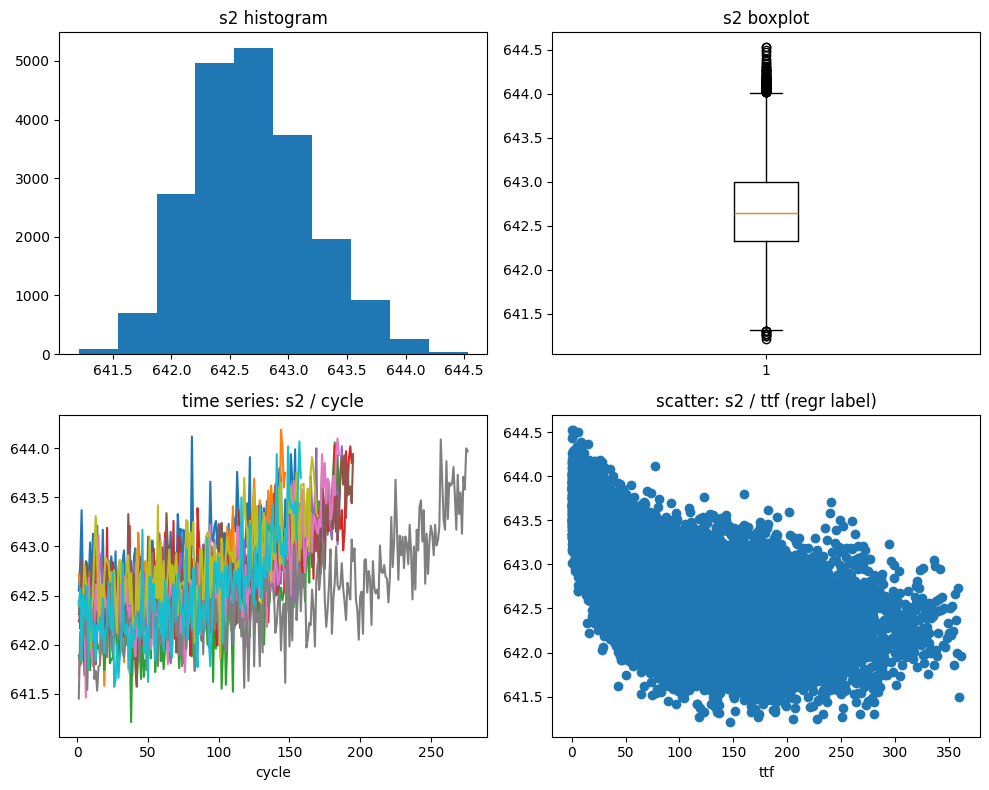

In [21]:
explore_col("s2", 10)

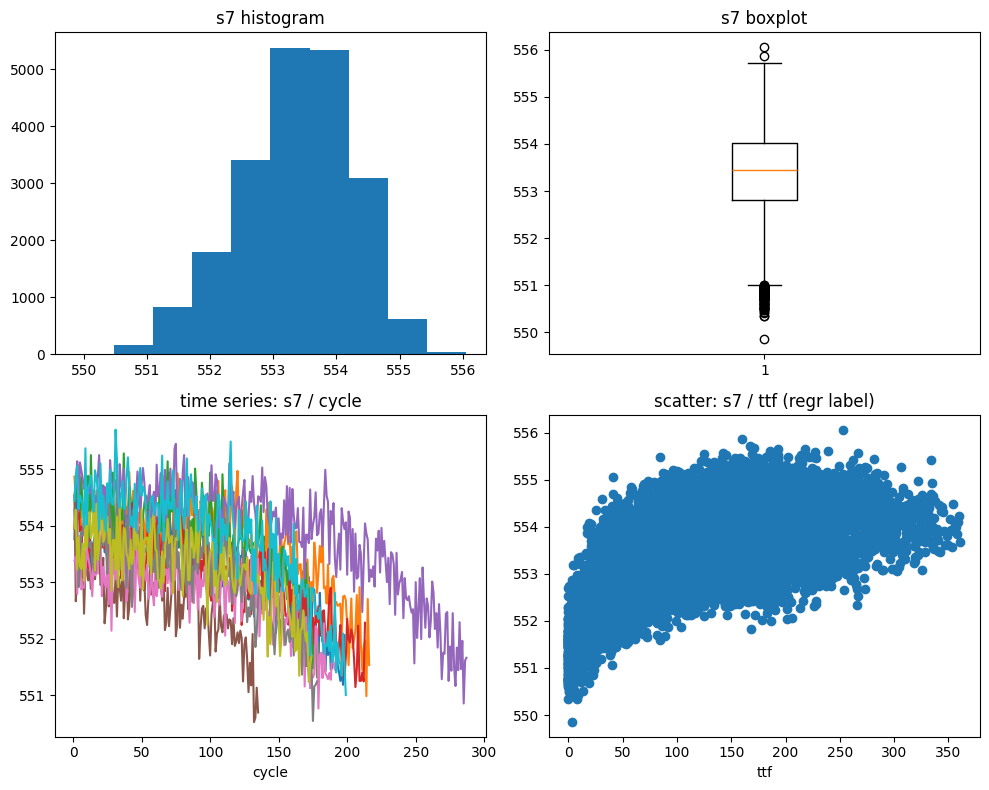

In [22]:
explore_col("s7", 10)

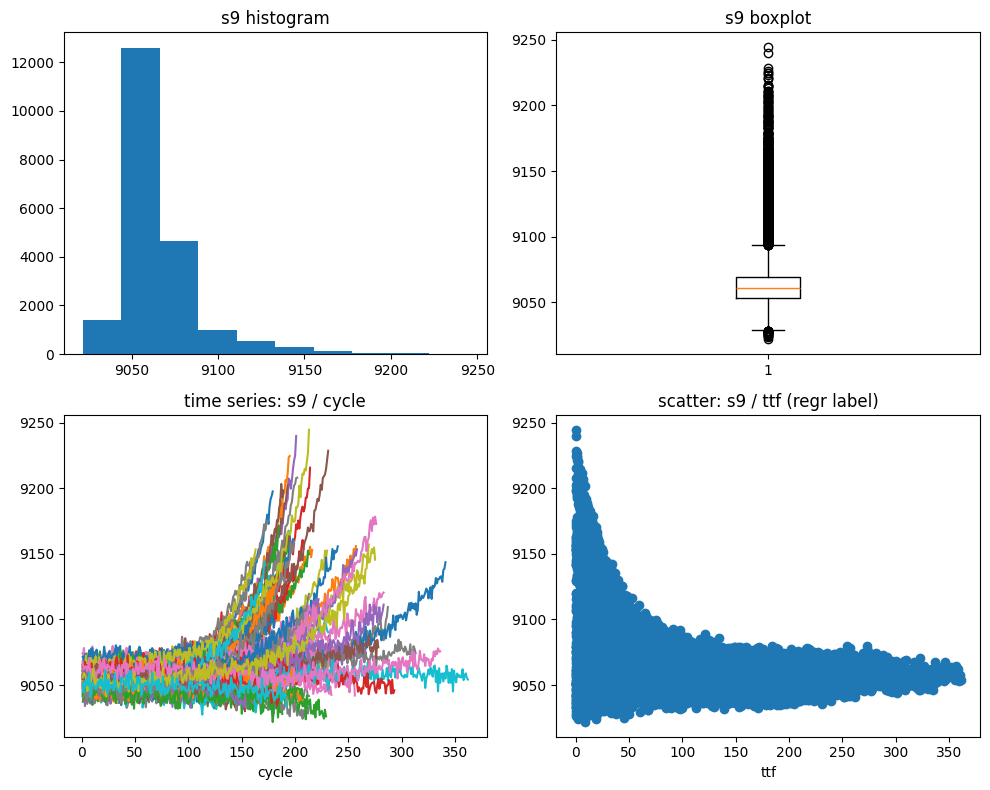

In [23]:
explore_col("s9", 100)

In [24]:
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):

    """Plot time series of a single sensor for 10 random sample engines.

        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots

    """

    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)

    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()

    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

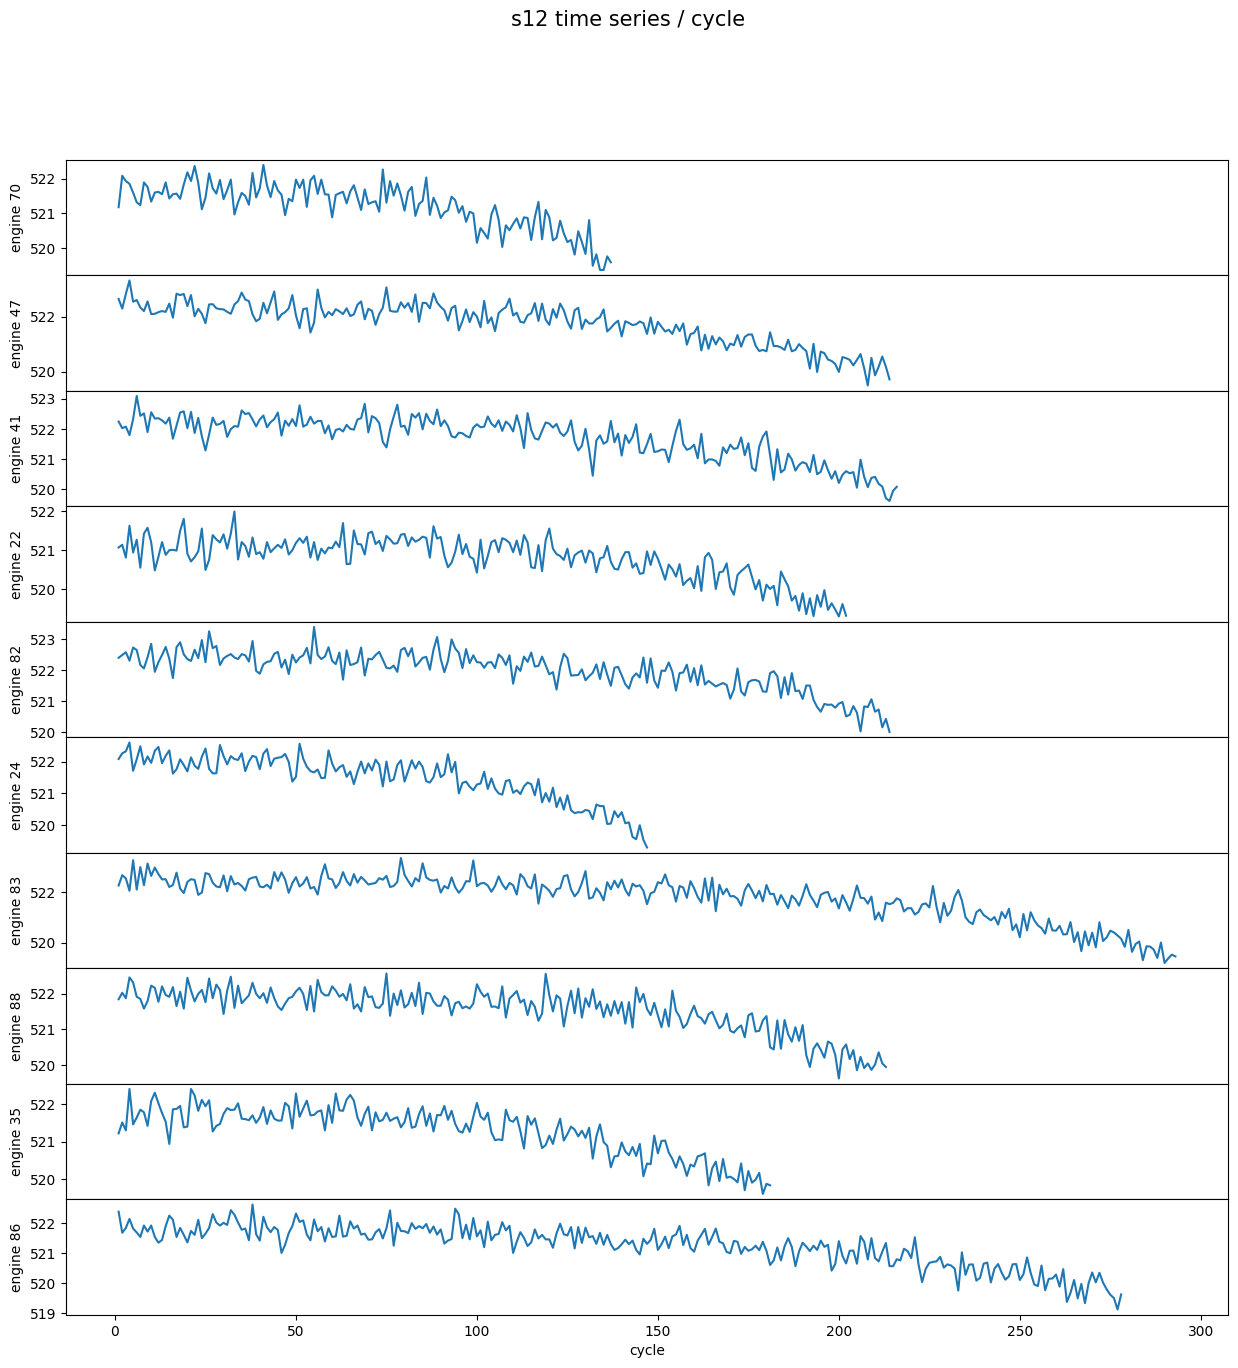

In [25]:
plot_time_series('s12')

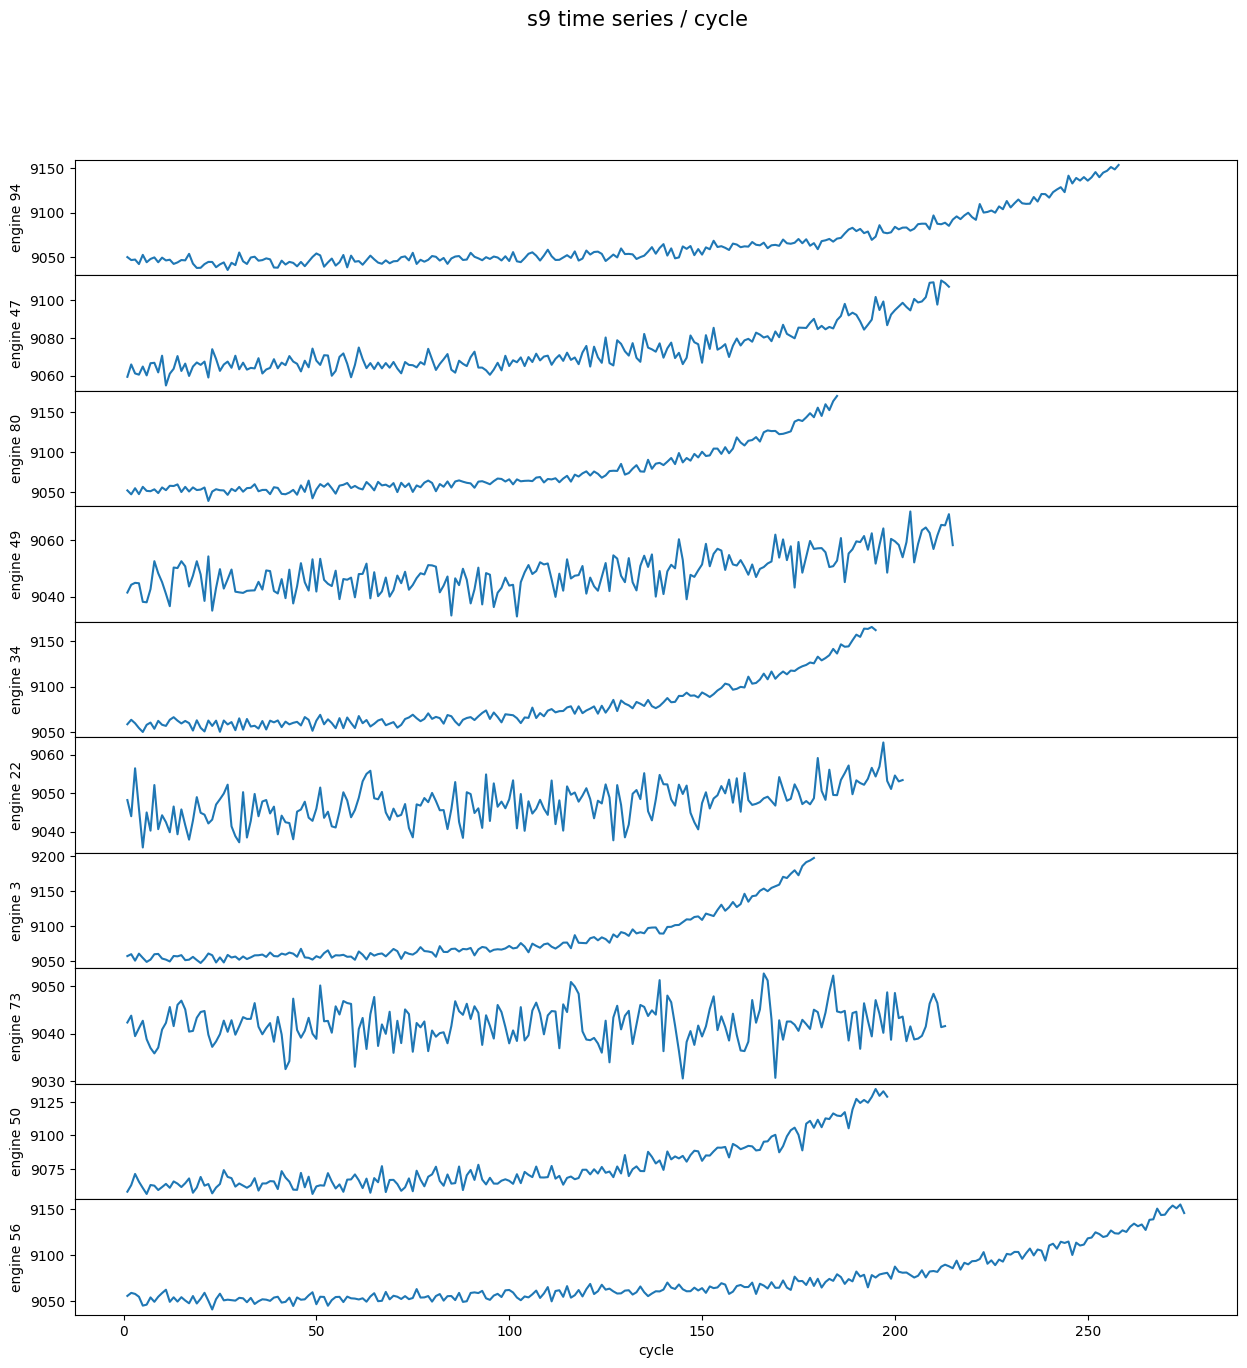

In [26]:
plot_time_series('s9')

In [27]:
# print stat for binary classification label

print(df_tr_lbl['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))

label_bnc
0    17531
1     3100
Name: count, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


This is an unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.

In [28]:
# print stat for multiclass classification label

print(df_tr_lbl['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

label_mcc
0    17531
2     1600
1     1500
Name: count, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


# Insights obtained from EDA

There is a very high correlation (> 0.8) between some features e.g.(s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). This multicollinearity may hurt the performance of some machine learning algorithms. So, part of these features will be target for elimination in feature selection during the modeling phase.
Most features have nonlinear relation with the TTF, hence adding their polynomial transforms may enhance models performance.
Most features exhibit normal distribution which is likely improves models performance.
AUC ROC should be used for classification models evaluation instead of Accuracy due to class’s imbalance in the training data.

# Binary Classification

In [29]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [30]:
# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extr = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']

In [31]:
def bin_classify(model, clf, features, params=None, score=None):

    """Perfor Grid Search hyper parameter tuning on a classifier.

    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score

    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores

    """

    X_train = df_train[features]

    X_test = df_test[features]

    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    if hasattr(grid_search, 'predict_proba'):
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred

    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)

    return grid_search.best_estimator_, df_predictions


In [32]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):

    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.

    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves

    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold

    """

    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]
    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)

    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []
    for thr in thresh_roc:
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }

    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)

    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75

    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)

    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])

    df_roc_thresh['Model'] = model

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []
    for thr in thresh_prc:
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')
        ax3.plot(thresh_roc, tpr, color='green',label='TPR')
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines')
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')
        ax4.plot(thresh_prc, recall, color='green',label='Recall')
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines')
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters:
 LogisticRegression(random_state=123)
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Logistic Regression B
Accuracy                0.880000
Precision               0.933333
Recall                  0.560000
F1 Score                0.700000
ROC AUC                 0.980267

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.989186   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.773818  12  13  75   0 

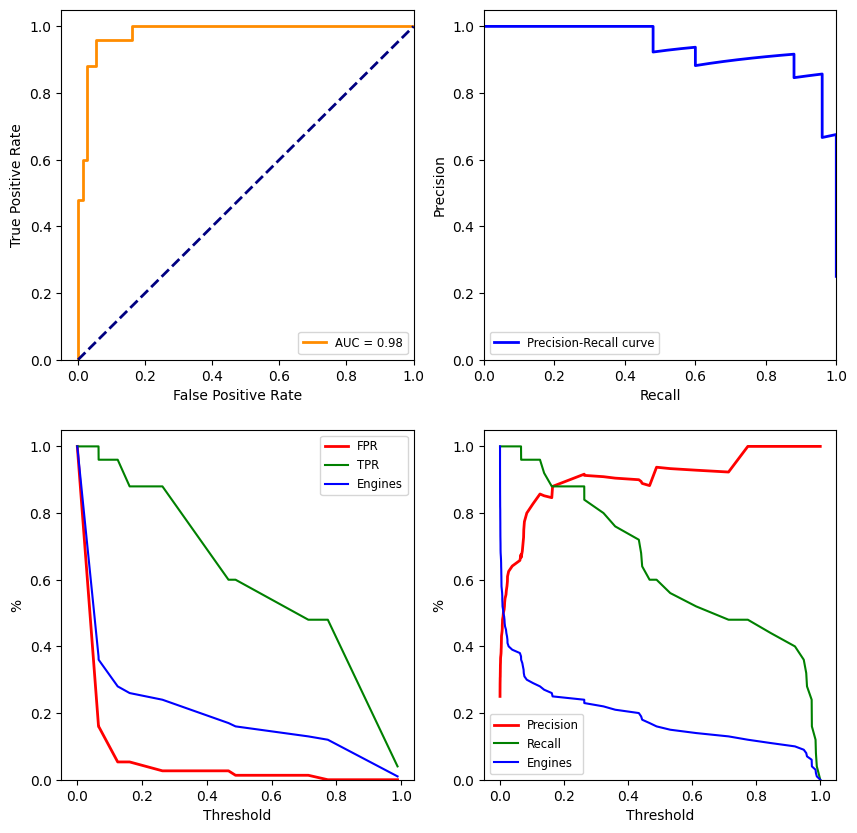

In [33]:
model = 'Logistic Regression B'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters:
 LogisticRegression(random_state=123)
-----------------------------------------------------------
Logistic Regression A 

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.68      0.81        25

    accuracy                           0.92       100
   macro avg       0.95      0.84      0.88       100
weighted avg       0.93      0.92      0.91       100


Metrics:
           Logistic Regression A
Accuracy                0.920000
Precision               1.000000
Recall                  0.680000
F1 Score                0.809524
ROC AUC                 0.978133

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.994774   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.360590  19   6  75   0 

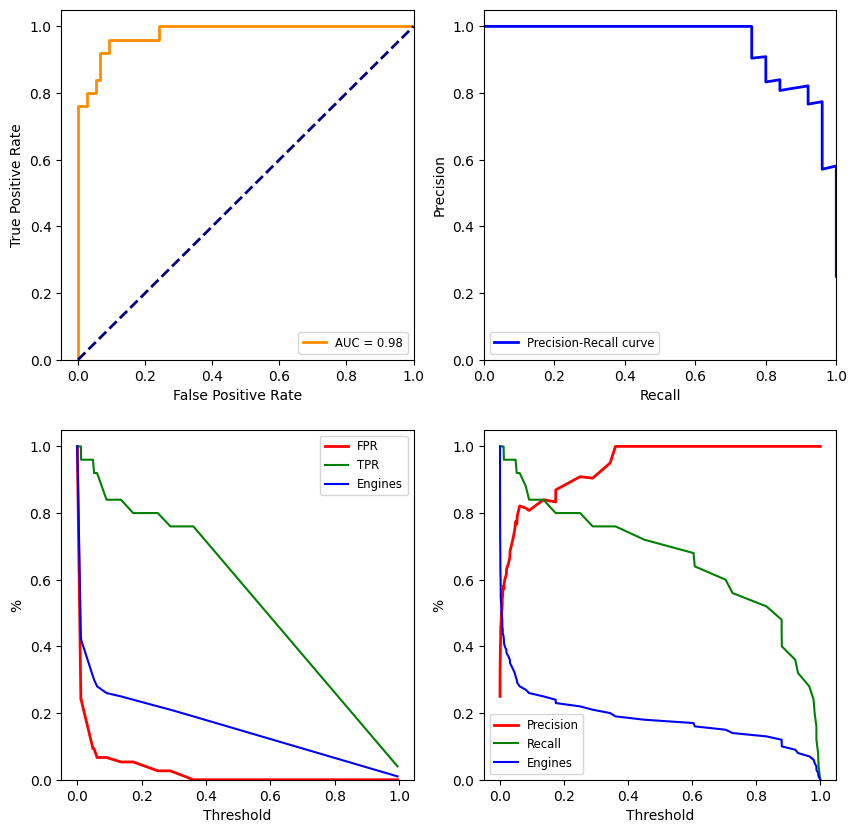

In [34]:
model = 'Logistic Regression A'
clf_lgra = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgra, pred_lgra = bin_classify(model, clf_lgra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, roc_lgra, prc_lgra = bin_class_metrics(model, y_test, pred_lgra.y_pred, pred_lgra.y_score, print_out=True, plot_out=True)

In [35]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

Logistic Regression B  Logistic Regression A
Accuracy                0.880000               0.920000
Precision               0.933333               1.000000
Recall                  0.560000               0.680000
F1 Score                0.700000               0.809524
ROC AUC                 0.980267               0.978133

-----------------------------------------------------------
SVC B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              SVC B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.891733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.404939   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.730702  13  12  75   0  0.52  0.000000  1.000000  0.862069  0.13
3    0.633695  13  12  74   1  0.52  0.013333  0.986667  0.860465  0.14
4    0.291689  17   8  74   1  0.68 

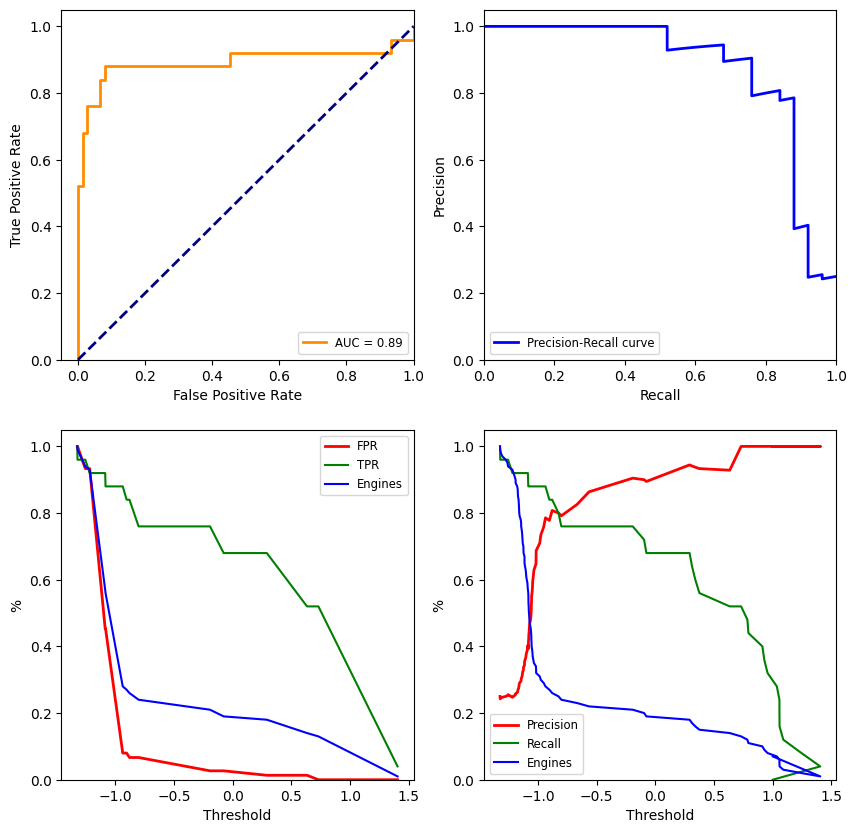

In [36]:
model = 'SVC B'
clf_svcb = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'
X_train = df_train[features_orig]
X_test = df_test[features_orig]
clf_svcb.fit(X_train, y_train)
y_pred = clf_svcb.predict(X_test)
y_score = clf_svcb.decision_function(X_test)
predictions = {'y_pred' : y_pred, 'y_score' : y_score}
pred_svcb = pd.DataFrame.from_dict(predictions)

metrics_svcb, roc_svcb, prc_svcb = bin_class_metrics(model, y_test, pred_svcb.y_pred, pred_svcb.y_score, print_out=True, plot_out=True)

-----------------------------------------------------------
SVC A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
              SVC A
Accuracy   0.920000
Precision  0.947368
Recall     0.720000
F1 Score   0.818182
ROC AUC    0.930133

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.591577   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.170038  17   8  75   0  0.68  0.000000  1.000000  0.903614  0.17
3    0.102965  17   8  74   1  0.68  0.013333  0.986667  0.902439  0.18
4   -0.227571  20   5  74   1  0.80 

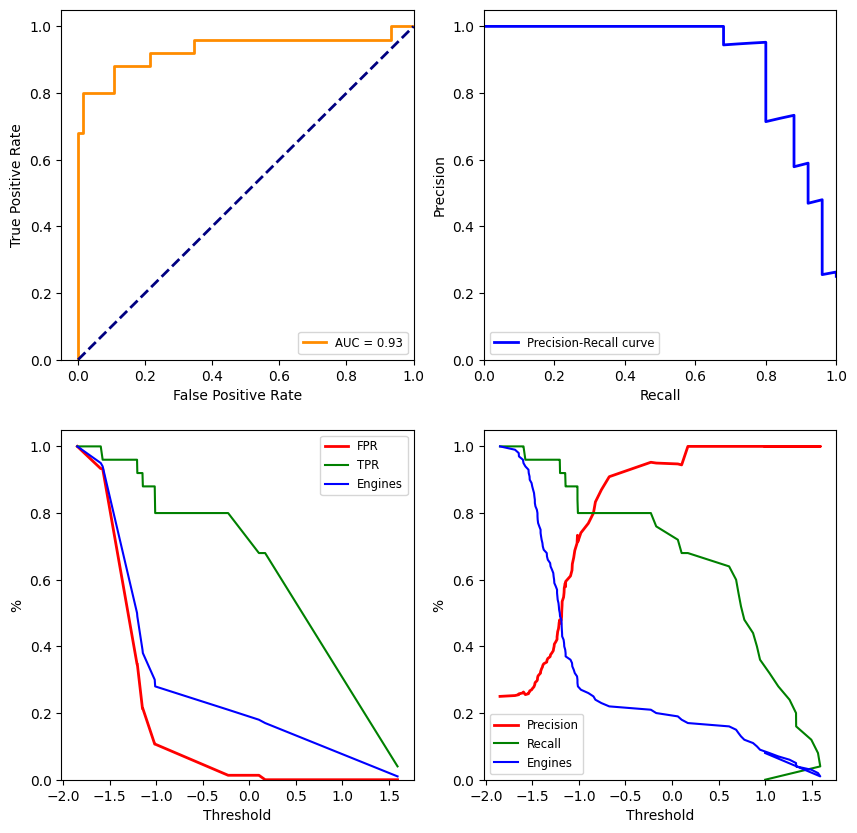

In [37]:
model = 'SVC A'
clf_svca = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'
X_train = df_train[features_extr]
X_test = df_test[features_extr]
clf_svca.fit(X_train, y_train)
y_pred = clf_svca.predict(X_test)
y_score = clf_svca.decision_function(X_test)
predictions = {'y_pred' : y_pred, 'y_score' : y_score}
pred_svca = pd.DataFrame.from_dict(predictions)

metrics_svca, roc_svca, prc_svca = bin_class_metrics(model, y_test, pred_svca.y_pred, pred_svca.y_score, print_out=True, plot_out=True)

In [38]:
# Compare SVC Before and After FE
metrics_svc = pd.concat([metrics_svcb, metrics_svca], axis=1)
metrics_svc.sort_index()

SVC B     SVC A
Accuracy   0.910000  0.920000
F1 Score   0.790698  0.818182
Precision  0.944444  0.947368
ROC AUC    0.891733  0.930133
Recall     0.680000  0.720000


Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              KNN B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.935200

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   5  20  75   0  0.20  0.000000  1.000000  0.789474  0.05
2    0.923077  10  15  75   0  0.40  0.000000  1.000000  0.833333  0.10
3    0.846154  12  13  75   0  0.48  0.00

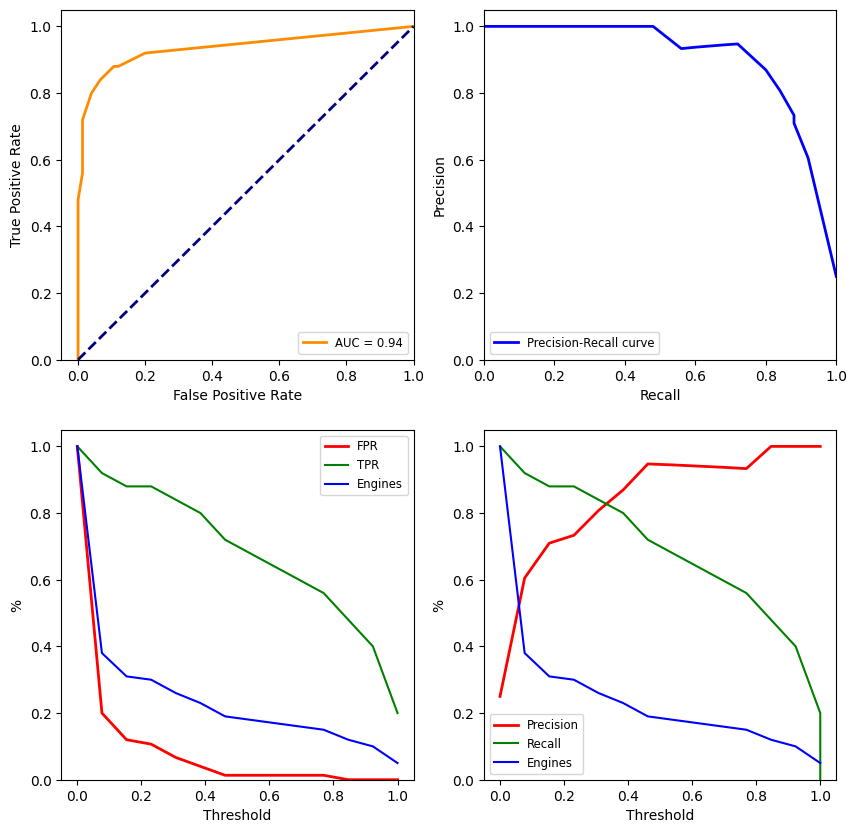

In [39]:
model = 'KNN B'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knnb, pred_knnb = bin_classify(model, clf_knnb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knnb)

metrics_knnb, roc_knnb, prc_knnb = bin_class_metrics(model, y_test, pred_knnb.y_pred, pred_knnb.y_score, print_out=True, plot_out=True)


Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
              KNN A
Accuracy   0.920000
Precision  0.947368
Recall     0.720000
F1 Score   0.818182
ROC AUC    0.963467

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2    0.923077  12  13  75   0  0.48  0.000000  1.000000  0.852273  0.12
3    0.846154  14  10  75   0  0.56  0.00

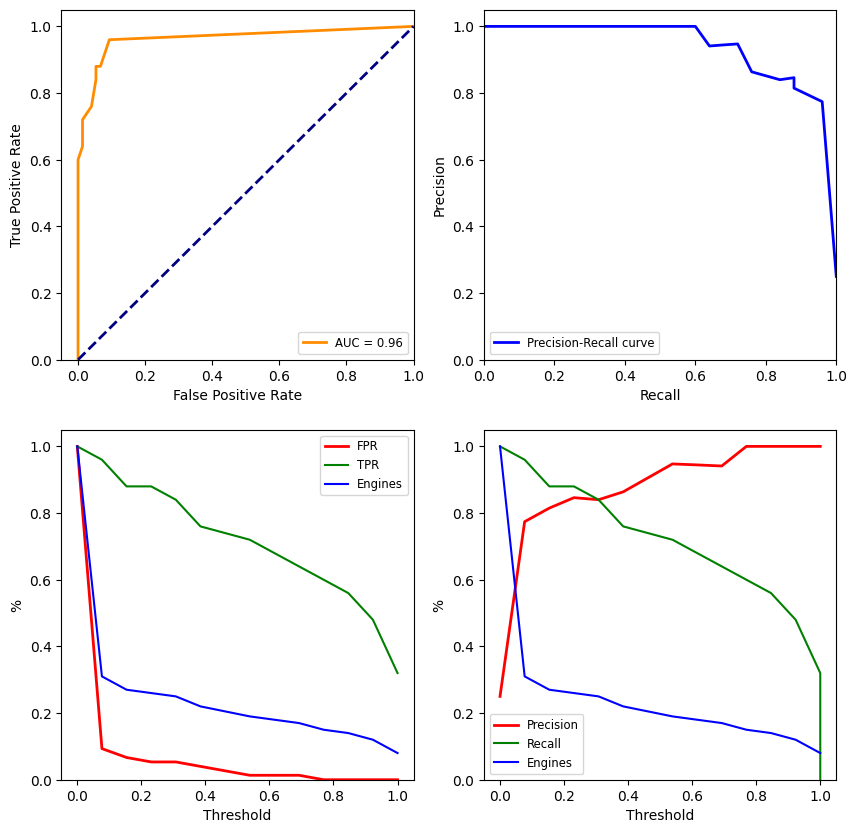

In [40]:
model = 'KNN A'
clf_knna = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9 , 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knna, pred_knna = bin_classify(model, clf_knna, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knna)

metrics_knna, roc_knna, prc_knna = bin_class_metrics(model, y_test, pred_knna.y_pred, pred_knna.y_score, print_out=True, plot_out=True)

In [41]:
# Compare KNN Before and After FE
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn.sort_index()

KNN B     KNN A
Accuracy   0.910000  0.920000
F1 Score   0.790698  0.818182
Precision  0.944444  0.947368
ROC AUC    0.935200  0.963467
Recall     0.680000  0.720000


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB B
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.987733

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0            inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2   1.000000e+00  17   8  75   0  0.68  0.000000  1.000000  0.903614  0.17
3   1.000000e+00  17   8  

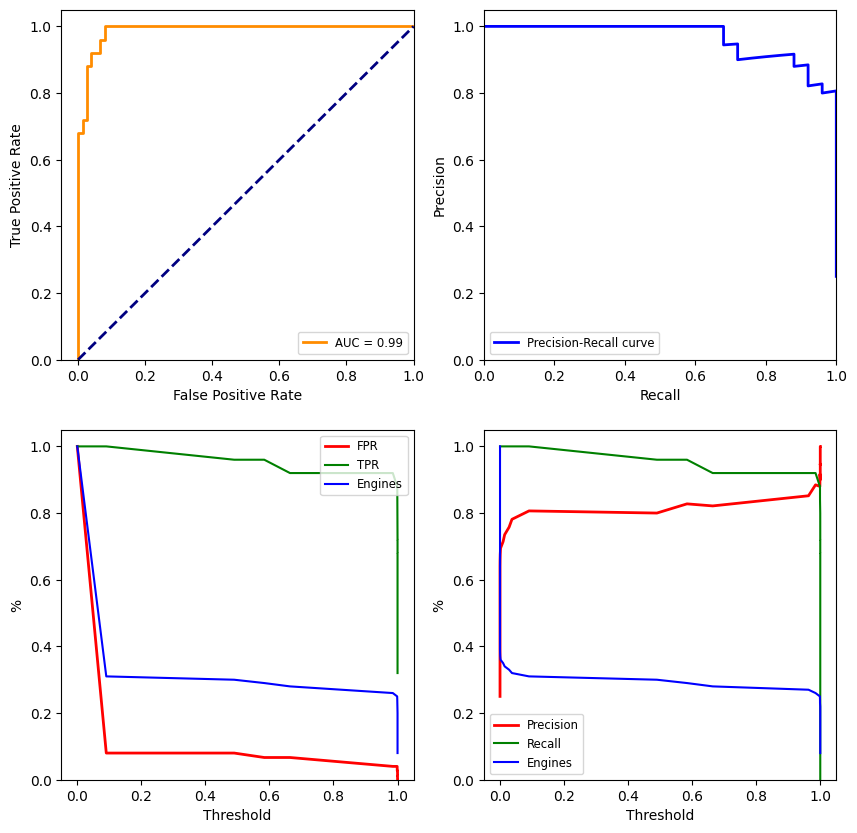

In [42]:
model = 'Gaussian NB B'
clf_gnbb = GaussianNB()
gs_params = {}
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, pred_gnbb.y_score, print_out=True, plot_out=True)


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB A 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB A
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.980533

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0            inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00  17   8  74   1  0.68  0.013333  0.986667  0.902439  0.18
2   1.000000e+00  20   5  74   1  0.80  0.013333  0.986667  0.936709  0.21
3   9.999630e-01  20   5  

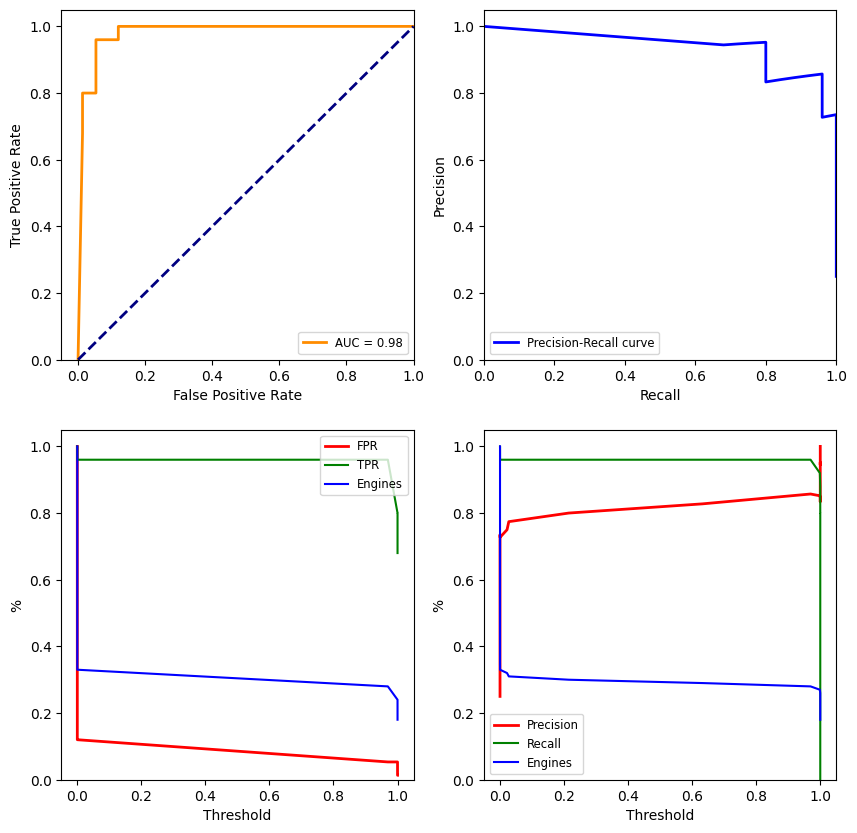

In [43]:
model = 'Gaussian NB A'
clf_gnba = GaussianNB()
gs_params = {}
gs_score = 'roc_auc'

clf_gnba, pred_gnba = bin_classify(model, clf_gnba, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnba)

metrics_gnba, roc_gnba, prc_gnba = bin_class_metrics(model, y_test, pred_gnba.y_pred, pred_gnba.y_score, print_out=True, plot_out=True)

In [44]:
# Compare Naive Bayes Before and After FE
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb.sort_index()

Gaussian NB B  Gaussian NB A
Accuracy        0.940000       0.940000
F1 Score        0.888889       0.888889
Precision       0.827586       0.827586
ROC AUC         0.987733       0.980533
Recall          0.960000       0.960000


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest B
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.980267

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.997997   1  24  75   0  0.04  0.000000  1.000000  0.757576 

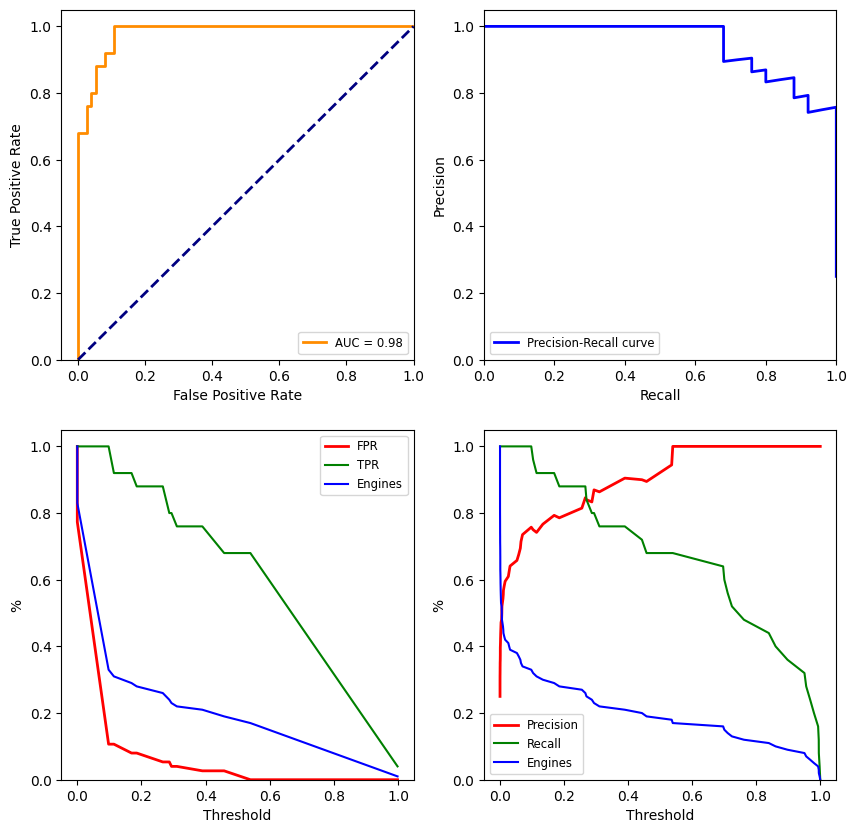

In [45]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest A 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest A
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.977600

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   2  23  75   0  0.08  0.000000  1.000000  0.765306 

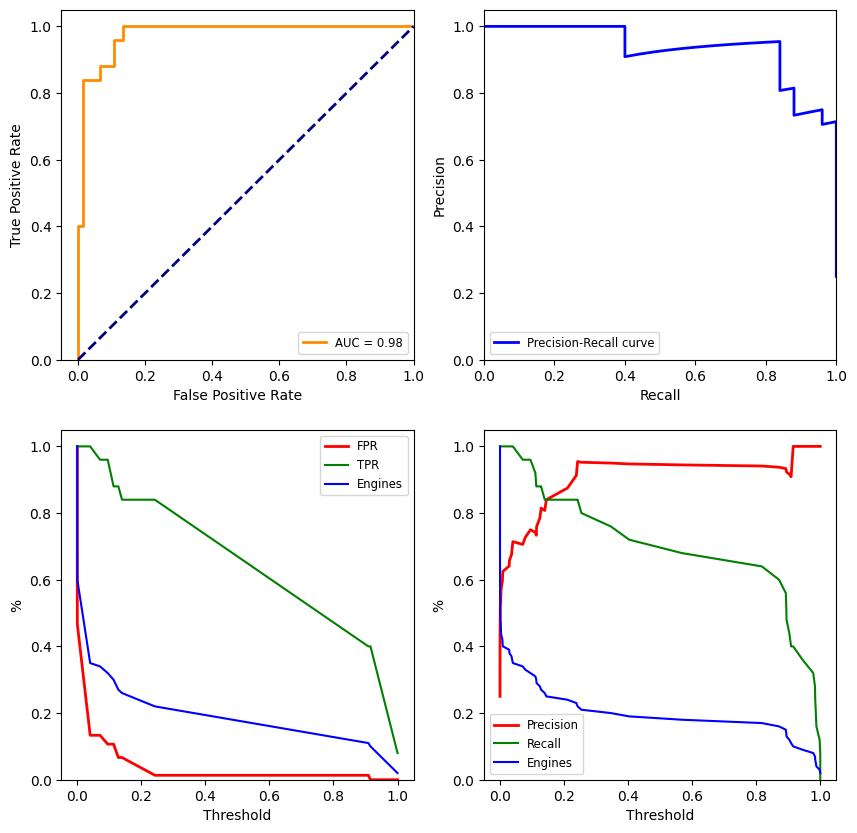

In [46]:
model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfca, pred_rfca = bin_classify(model, clf_rfca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, roc_rfca, prc_rfca = bin_class_metrics(model, y_test, pred_rfca.y_pred, pred_rfca.y_score, print_out=True, plot_out=True)

In [47]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

Random Forest B  Random Forest A
Accuracy          0.910000         0.910000
Precision         0.944444         0.944444
Recall            0.680000         0.680000
F1 Score          0.790698         0.790698
ROC AUC           0.980267         0.977600

In [48]:
#compare all models
metrics_bn = pd.concat([metrics_lgr, metrics_rfc, metrics_svc, metrics_knn, metrics_gnb], axis=1)
metrics_bn

Logistic Regression B  Logistic Regression A  Random Forest B  \
Accuracy                0.880000               0.920000         0.910000   
Precision               0.933333               1.000000         0.944444   
Recall                  0.560000               0.680000         0.680000   
F1 Score                0.700000               0.809524         0.790698   
ROC AUC                 0.980267               0.978133         0.980267   

           Random Forest A     SVC B     SVC A     KNN B     KNN A  \
Accuracy          0.910000  0.910000  0.920000  0.910000  0.920000   
Precision         0.944444  0.944444  0.947368  0.944444  0.947368   
Recall            0.680000  0.680000  0.720000  0.680000  0.720000   
F1 Score          0.790698  0.790698  0.818182  0.790698  0.818182   
ROC AUC           0.977600  0.891733  0.930133  0.935200  0.963467   

           Gaussian NB B  Gaussian NB A  
Accuracy        0.940000       0.940000  
Precision       0.827586       0.827586  
Recall          0.960000       0.960000  
F1 Score        0.888889       0.888889  
ROC AUC         0.987733       0.980533

Text(0.5, 1.0, 'Precision Recall Curve')

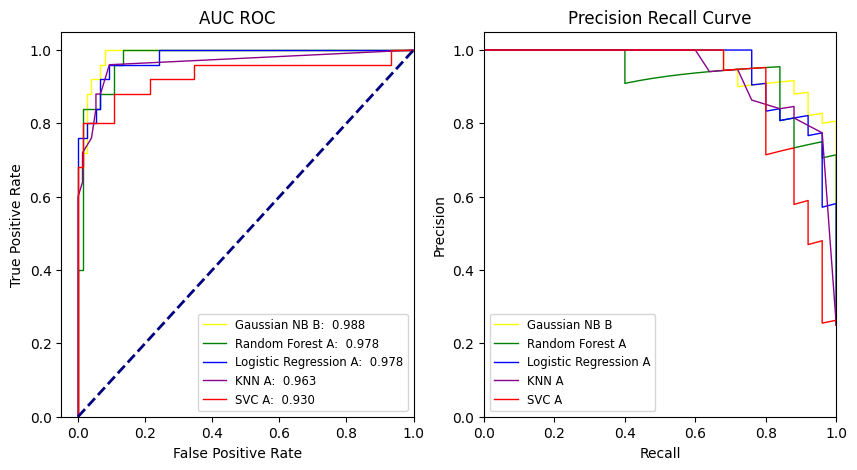

In [49]:
# Plot AUC-ROC and precision-recall curves for best models

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_gnbb.FPR, roc_gnbb.TPR, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0] + ':  %.3f' % metrics_gnbb.at['ROC AUC', metrics_gnbb.columns.values.tolist()[0]])
ax1.plot(roc_rfca.FPR, roc_rfca.TPR, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0] + ':  %.3f' % metrics_rfca.at['ROC AUC', metrics_rfca.columns.values.tolist()[0]])
ax1.plot(roc_lgra.FPR, roc_lgra.TPR, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0] + ':  %.3f' % metrics_lgra.at['ROC AUC', metrics_lgra.columns.values.tolist()[0]])
ax1.plot(roc_knna.FPR, roc_knna.TPR, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0] + ':  %.3f' % metrics_knna.at['ROC AUC', metrics_knna.columns.values.tolist()[0]])
ax1.plot(roc_svca.FPR, roc_svca.TPR, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0] + ':  %.3f' % metrics_svca.at['ROC AUC', metrics_svca.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('AUC ROC')

ax2.plot(prc_gnbb.Recall, prc_gnbb.Precision, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0])
ax2.plot(prc_rfca.Recall, prc_rfca.Precision, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0])
ax2.plot(prc_lgra.Recall, prc_lgra.Precision, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0])
ax2.plot(prc_knna.Recall, prc_knna.Precision, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0])
ax2.plot(prc_svca.Recall, prc_svca.Precision, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('Precision Recall Curve')


# Multi-Class Classification

In [50]:
y_train = df_train['label_mcc']
y_test = df_test['label_mcc']

lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [51]:
def multiclass_classify(model, clf, features, params=None, score=None, scale=False, OvR=True, prob='P'):

    """Perfor Grid Search hyper parameter tuning on a classifier.

    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score
        OvR (bool): True if the classifier inherently support multiclass One-Vs-Rest
        prob (str): For getting classification scores: 'P' for predict_proba, 'D' for decision_function

    Returns:
        Tuned Clssifier object
        array: prediction values
        array: prediction scores


    """


    X_train = df_train[features]

    X_test = df_test[features]

    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    if prob == 'P':
        y_score = grid_search.predict_proba(X_test)
        if OvR:
            y_score = [y_score[i][:,[1]] for i in range(len(y_score))]
            y_score = np.concatenate(y_score, axis=1)
    elif prob == 'D':
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred


    return grid_search.best_estimator_, y_pred, y_score

In [52]:
def multiclass_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):

    """Calculate main multiclass classifcation metrics, plot AUC ROC and Precision-Recall curves.

    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves

    Returns:
        dataframe: The combined metrics in single dataframe
        dict: ROC thresholds
        dict: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall


    """
    multiclass_metrics = {
                            'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                            'macro F1' : metrics.f1_score(y_test, y_pred, average='macro'),
                            'micro F1' : metrics.f1_score(y_test, y_pred, average='micro'),
                            'macro Precision' : metrics.precision_score(y_test, y_pred,  average='macro'),
                            'micro Precision' : metrics.precision_score(y_test, y_pred,  average='micro'),
                            'macro Recall' : metrics.recall_score(y_test, y_pred,  average='macro'),
                            'micro Recall' : metrics.recall_score(y_test, y_pred,  average='micro'),
                            'macro ROC AUC' : metrics.roc_auc_score(y_test, y_score, average='macro'),
                            'micro ROC AUC' : metrics.roc_auc_score(y_test, y_score, average='micro')
                        }

    df_metrics = pd.DataFrame.from_dict(multiclass_metrics, orient='index')
    df_metrics.columns = [model]


    n_classes = y_train.shape[1]

    fpr = dict()
    tpr = dict()
    thresh_roc = dict()
    roc_auc = dict()

    for i in range(n_classes):
        #fpr[i], tpr[i], thresh_roc[i] = metrics.roc_curve(y_test[:, i], y_score[i][:,0])
        fpr[i], tpr[i], thresh_roc[i] = metrics.roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], thresh_roc["micro"] = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])


    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'AUC' : roc_auc
                 }

    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    df_roc_thresh['Model'] = model
    df_roc_thresh['Class'] = df_roc_thresh.index



    precision = dict()
    recall = dict()
    thresh_prc = dict()
    average_precision = dict()

    for i in range(n_classes):
        #precision[i], recall[i], thresh_prc[i] = metrics.precision_recall_curve(y_test[:, i], y_score[i][:,0])
        precision[i], recall[i], thresh_prc[i] = metrics.precision_recall_curve(y_test[:, i], y_score[:, i])
        average_precision[i] = metrics.average_precision_score(y_test[:, i], y_score[:, i])

    precision["micro"], recall["micro"], thresh_prc["micro"] = metrics.precision_recall_curve(y_test.ravel(), y_score.ravel())
    average_precision["micro"] = metrics.average_precision_score(y_test, y_score, average="micro")

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Avg Precision' : average_precision
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)
    df_prc_thresh['Model'] = model
    df_prc_thresh['Class'] = df_prc_thresh.index

    y_test_orig = lb.inverse_transform(y_test)
    y_pred_orig = lb.inverse_transform(y_pred)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test_orig, y_pred_orig))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test_orig, y_pred_orig))
        print('\nMetrics:')
        print(df_metrics)

    if plot_out:

        colors = cycle(['red', 'green', 'blue'])

        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(12,6)

        for i, color in zip(range(n_classes), colors):
            ax1.plot(fpr[i], tpr[i], color=color, lw=1, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

        ax1.plot(fpr["micro"], tpr["micro"], color='deeppink', label='micro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["micro"]), linestyle=':', linewidth=4)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')


        for i, color in zip(range(n_classes), colors):
            ax2.plot(recall[i], precision[i], color=color, lw=1, label='Precision-recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

        ax2.plot(recall["micro"], precision["micro"], color='deeppink', lw=4, linestyle=':', label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

    return df_metrics, df_prc_thresh, df_roc_thresh


Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)
-----------------------------------------------------------
Decision Tree B 

Confusion Matrix:
[[74  1  0]
 [12  2  1]
 [ 1  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        75
           1       0.67      0.13      0.22        15
           2       0.90      0.90      0.90        10

    accuracy                           0.85       100
   macro avg       0.81      0.67      0.68       100
weighted avg       0.83      0.85      0.81       100


Metrics:
                 Decision Tree B
Accuracy                0.840000
macro F1                0.684053
micro F1                0.861538
macro Precision         0.818970
micro Precision         0.884211
macro Recall            0.668889
micro Recall            0.840000
macro ROC AUC           0.905594
micro ROC AUC           0.956625


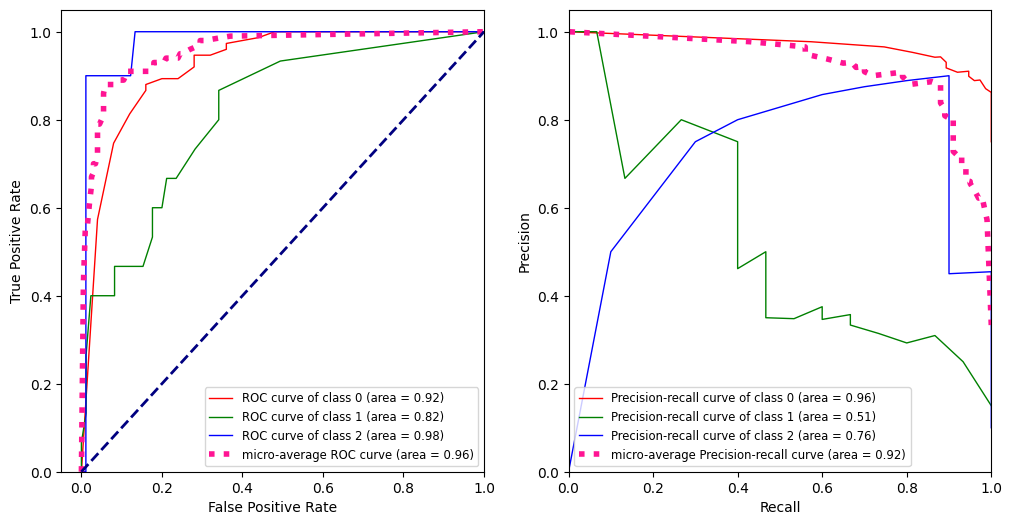

In [53]:
model = 'Decision Tree B'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [ 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, y_pred_dtrb, y_score_dtrb = multiclass_classify(model, clf_dtrb, features_orig, params=gs_params, score=gs_score, scale=False, OvR=True, prob='P')
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, prc_dtrb, roc_dtrb = multiclass_metrics(model, y_test, y_pred_dtrb, y_score_dtrb, print_out=True, plot_out=True)


Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
-----------------------------------------------------------
Decision Tree A 

Confusion Matrix:
[[74  0  1]
 [10  1  4]
 [ 1  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       1.00      0.07      0.12        15
           2       0.64      0.90      0.75        10

    accuracy                           0.84       100
   macro avg       0.84      0.65      0.60       100
weighted avg       0.87      0.84      0.79       100


Metrics:
                 Decision Tree A
Accuracy                0.840000
macro F1                0.607906
micro F1                0.857143
macro Precision         0.852146
micro Precision         0.875000
macro Recall            0.651111
micro Recall            0.840000
macro ROC AUC           0.949857
micro ROC AUC           0.973550


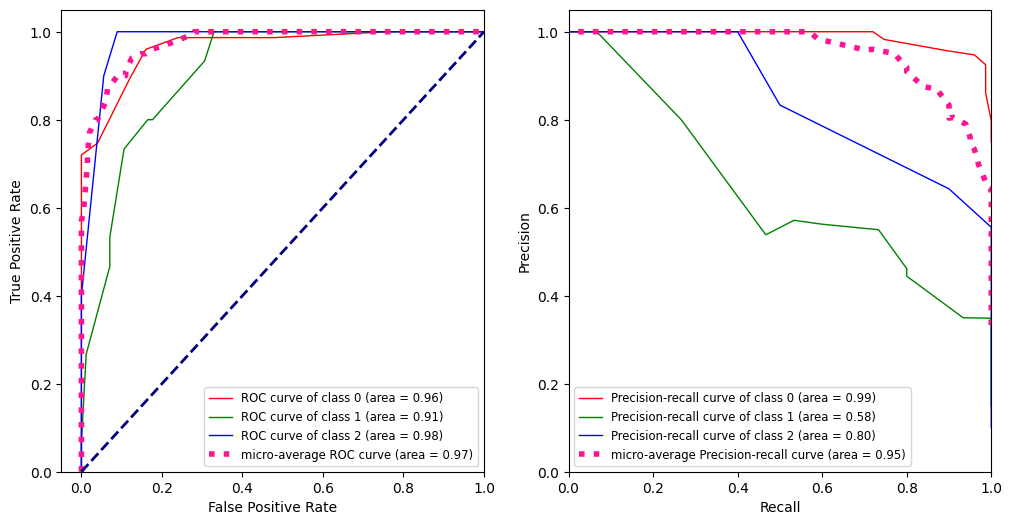

In [54]:
model = 'Decision Tree A'
clf_dtra = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [ 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtra, y_pred_dtra, y_score_dtra = multiclass_classify(model, clf_dtrb,
                                            features_extr, params=gs_params, score=gs_score, scale=False, OvR=True, prob='P')
print('\nBest Parameters:\n',clf_dtra)

metrics_dtra, prc_dtra, roc_dtra = multiclass_metrics(model, y_test, y_pred_dtra, y_score_dtra, print_out=True, plot_out=True)

In [55]:
metrics_dtr = pd.concat([metrics_dtrb, metrics_dtra], axis=1)
metrics_dtr


Decision Tree B  Decision Tree A
Accuracy                0.840000         0.840000
macro F1                0.684053         0.607906
micro F1                0.861538         0.857143
macro Precision         0.818970         0.852146
micro Precision         0.884211         0.875000
macro Recall            0.668889         0.651111
micro Recall            0.840000         0.840000
macro ROC AUC           0.905594         0.949857
micro ROC AUC           0.956625         0.973550


Best Parameters:
 OneVsRestClassifier(estimator=LinearSVC(C=0.1, random_state=123))
-----------------------------------------------------------
SVC Linear B 

Confusion Matrix:
[[75  0  0]
 [13  0  2]
 [ 4  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       0.00      0.00      0.00        15
           2       0.75      0.60      0.67        10

    accuracy                           0.81       100
   macro avg       0.52      0.53      0.52       100
weighted avg       0.69      0.81      0.74       100


Metrics:
                 SVC Linear B
Accuracy             0.800000
macro F1             0.532495
micro F1             0.833333
macro Precision      0.543651
micro Precision      0.869565
macro Recall         0.528889
micro Recall         0.800000
macro ROC AUC        0.940285
micro ROC AUC        0.965400


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

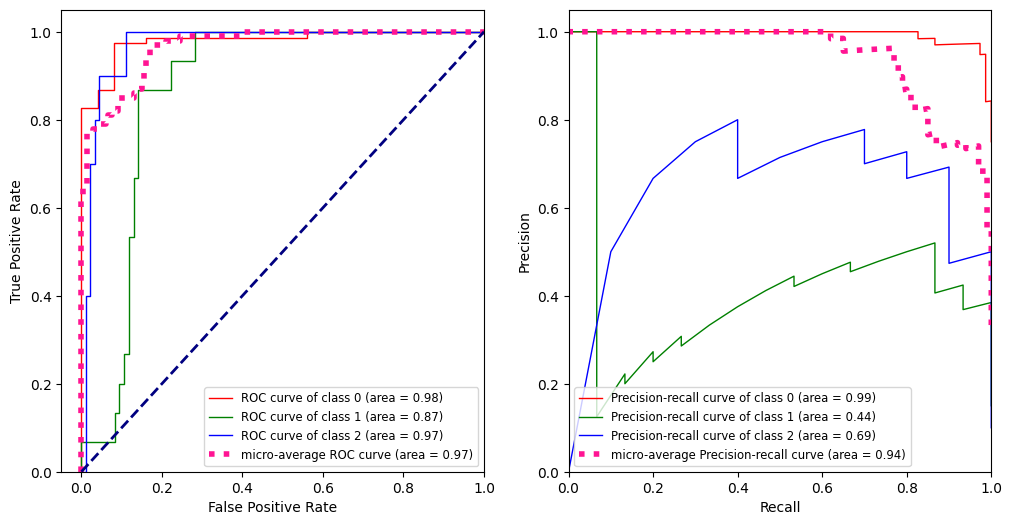

In [56]:
model = 'SVC Linear B'

clf_svlb = OneVsRestClassifier(LinearSVC(random_state=123))
gs_params = {'estimator__C': [.01, 0.1, 1.0]}
gs_score = 'roc_auc'


clf_svlb, y_pred_svlb, y_score_svlb = multiclass_classify(model, clf_svlb, features_orig, params=gs_params, score=gs_score, scale=False, OvR=False, prob='D')
print('\nBest Parameters:\n',clf_svlb)

metrics_svlb, prc_svlb, roc_svlb = multiclass_metrics(model, y_test, y_pred_svlb, y_score_svlb, print_out=True, plot_out=True)


Best Parameters:
 OneVsRestClassifier(estimator=LinearSVC(C=0.01, random_state=123))
-----------------------------------------------------------
SVC Linear A 

Confusion Matrix:
[[75  0  0]
 [14  0  1]
 [ 3  0  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       0.00      0.00      0.00        15
           2       0.88      0.70      0.78        10

    accuracy                           0.82       100
   macro avg       0.56      0.57      0.56       100
weighted avg       0.70      0.82      0.75       100


Metrics:
                 SVC Linear A
Accuracy             0.820000
macro F1             0.575715
micro F1             0.858639
macro Precision      0.592871
micro Precision      0.901099
macro Recall         0.566667
micro Recall         0.820000
macro ROC AUC        0.943779
micro ROC AUC        0.969150


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

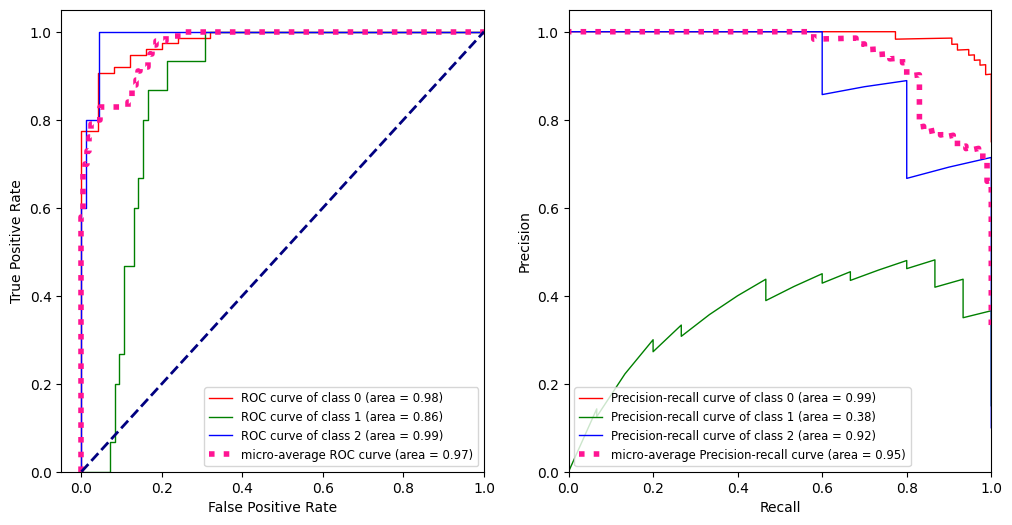

In [57]:
model = 'SVC Linear A'

clf_svla = OneVsRestClassifier(LinearSVC(random_state=123))
gs_params = {'estimator__C': [.01, 0.1, 1.0]}
gs_score = 'roc_auc'


clf_svla, y_pred_svla, y_score_svla = multiclass_classify(model, clf_svla, features_extr, params=gs_params, score=gs_score, scale=False, OvR=False, prob='D')
print('\nBest Parameters:\n',clf_svla)

metrics_svla, prc_svla, roc_svla = multiclass_metrics(model, y_test, y_pred_svla, y_score_svla, print_out=True, plot_out=True)

In [58]:
metrics_svl = pd.concat([metrics_svlb, metrics_svla], axis=1)
metrics_svl

SVC Linear B  SVC Linear A
Accuracy             0.800000      0.820000
macro F1             0.532495      0.575715
micro F1             0.833333      0.858639
macro Precision      0.543651      0.592871
micro Precision      0.869565      0.901099
macro Recall         0.528889      0.566667
micro Recall         0.800000      0.820000
macro ROC AUC        0.940285      0.943779
micro ROC AUC        0.965400      0.969150

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Best Parameters:
 OneVsRestClassifier(estimator=LogisticRegression(C=0.01, random_state=123))
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[75  0  0]
 [13  0  2]
 [ 4  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       0.00      0.00      0.00        15
           2       0.75      0.60      0.67        10

    accuracy                           0.81       100
   macro avg       0.52      0.53      0.52       100
weighted avg       0.69      0.81      0.74       100


Metrics:
                 Logistic Regression B
Accuracy                      0.800000
macro F1                      0.530556
micro F1                      0.829016
macro Precision               0.540196
micro Precision               0.860215
macro Recall                  0.528889
micro Recall                  0.800000
macro ROC AUC                 0.942057


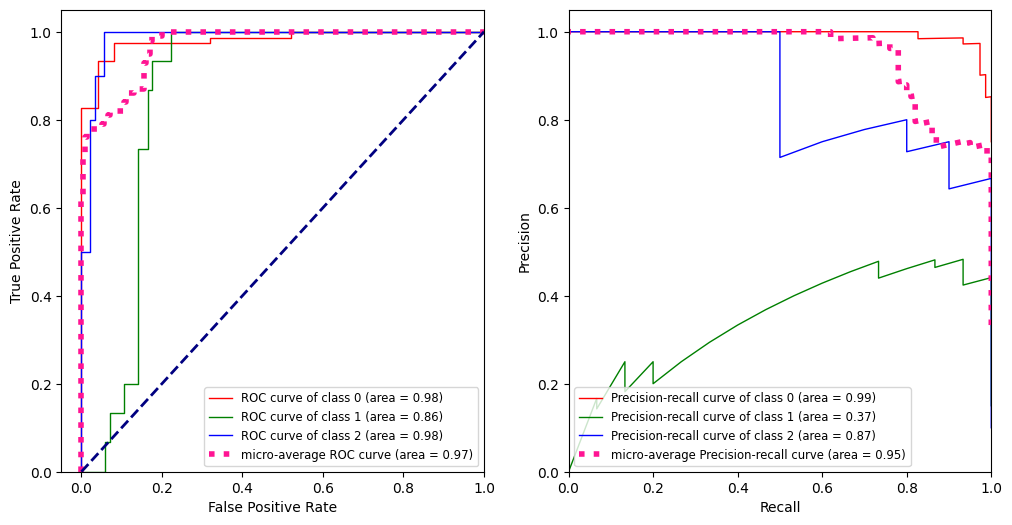

In [59]:
model = 'Logistic Regression B'

clf_lgrb = OneVsRestClassifier(LogisticRegression(random_state=123))
gs_params = {'estimator__C': [.01, 0.1, 1.0, 10], 'estimator__solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'


clf_lgrb, y_pred_lgrb, y_score_lgrb = multiclass_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score, scale=False, OvR=False)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, prc_lgrb, roc_lgrb = multiclass_metrics(model, y_test, y_pred_lgrb, y_score_lgrb, print_out=True, plot_out=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Best Parameters:
 OneVsRestClassifier(estimator=LogisticRegression(C=0.1, random_state=123))
-----------------------------------------------------------
Logistic Regression A 

Confusion Matrix:
[[75  0  0]
 [14  0  1]
 [ 4  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        75
           1       0.00      0.00      0.00        15
           2       0.86      0.60      0.71        10

    accuracy                           0.81       100
   macro avg       0.55      0.53      0.53       100
weighted avg       0.69      0.81      0.74       100


Metrics:
                 Logistic Regression A
Accuracy                      0.810000
macro F1                      0.551750
micro F1                      0.852632
macro Precision               0.586919
micro Precision               0.900000
macro Recall                  0.533333
micro Recall                  0.810000
macro ROC AUC                 0.941840
m

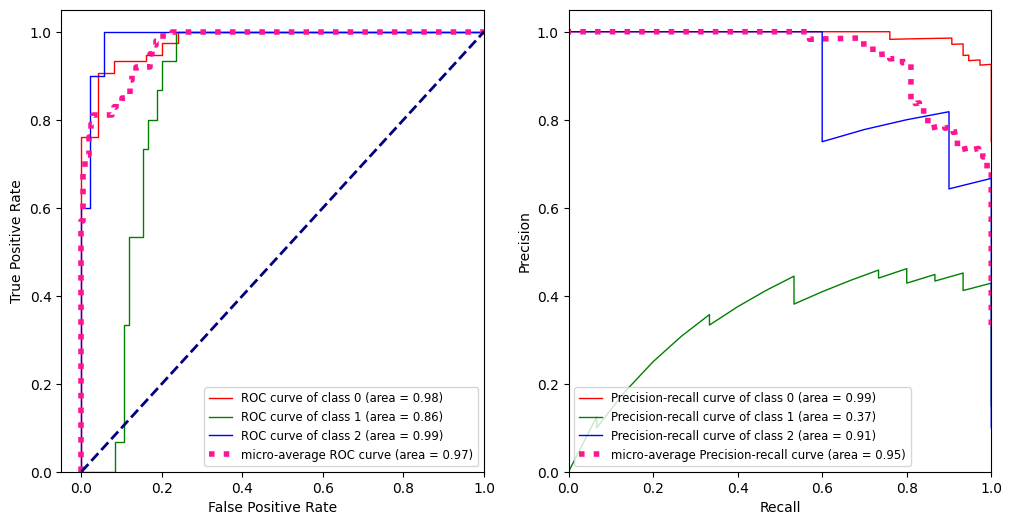

In [60]:
model = 'Logistic Regression A'

clf_lgra = OneVsRestClassifier(LogisticRegression(random_state=123))
gs_params = {'estimator__C': [.01, 0.1, 1.0, 10], 'estimator__solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'


clf_lgra, y_pred_lgra, y_score_lgra = multiclass_classify(model, clf_lgra, features_extr, params=gs_params, score=gs_score, scale=False, OvR=False)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, prc_lgra, roc_lgra = multiclass_metrics(model, y_test, y_pred_lgra, y_score_lgra, print_out=True, plot_out=True)

In [61]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

Logistic Regression B  Logistic Regression A
Accuracy                      0.800000               0.810000
macro F1                      0.530556               0.551750
micro F1                      0.829016               0.852632
macro Precision               0.540196               0.586919
micro Precision               0.860215               0.900000
macro Recall                  0.528889               0.533333
micro Recall                  0.800000               0.810000
macro ROC AUC                 0.942057               0.941840
micro ROC AUC                 0.969450               0.970250


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[75  0  0]
 [11  2  2]
 [ 3  1  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        75
           1       0.67      0.13      0.22        15
           2       0.75      0.60      0.67        10

    accuracy                           0.83       100
   macro avg       0.75      0.58      0.60       100
weighted avg       0.81      0.83      0.79       100


Metrics:
                 Random Forest B
Accuracy                0.820000
macro F1                0.612536
micro F1                0.854167
macro Precision         0.776749
micro Precision         0.891304
macro Recall            0.573333
micro Recall            0.820000
macro ROC AUC           0.964340
micro ROC AUC        

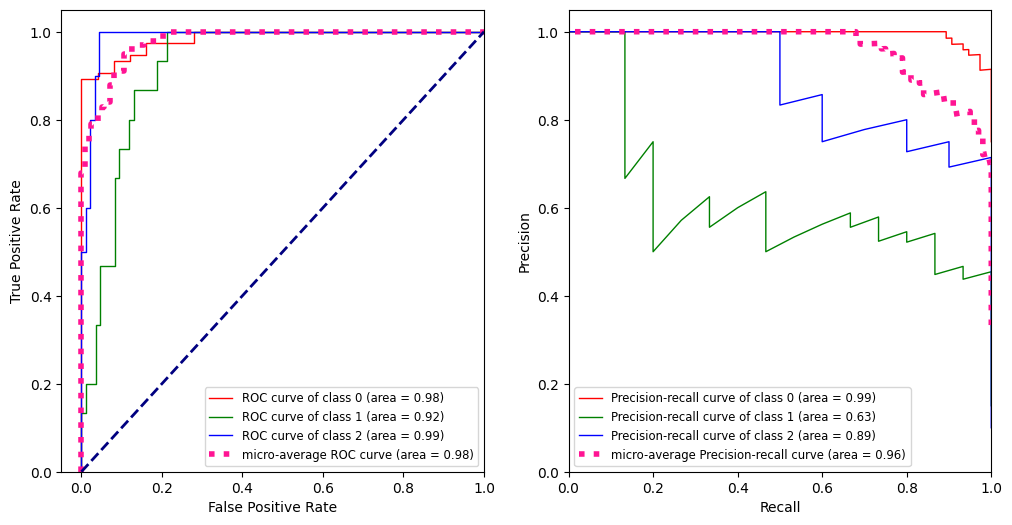

In [62]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'


clf_rfcb, y_pred_rfcb, y_score_rfcb = multiclass_classify(model, clf_rfcb, features_orig, params=gs_params, score=gs_score, scale=False)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, prc_rfcb, roc_rfcb = multiclass_metrics(model, y_test, y_pred_rfcb, y_score_rfcb, print_out=True, plot_out=True)


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest A 

Confusion Matrix:
[[74  1  0]
 [12  2  1]
 [ 0  2  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        75
           1       0.40      0.13      0.20        15
           2       0.89      0.80      0.84        10

    accuracy                           0.84       100
   macro avg       0.72      0.64      0.65       100
weighted avg       0.79      0.84      0.80       100


Metrics:
                 Random Forest A
Accuracy                0.840000
macro F1                0.661593
micro F1                0.857143
macro Precision         0.730443
micro Precision         0.875000
macro Recall            0.640000
micro Recall            0.840000
macro ROC AUC           0.969290
micro ROC AUC        

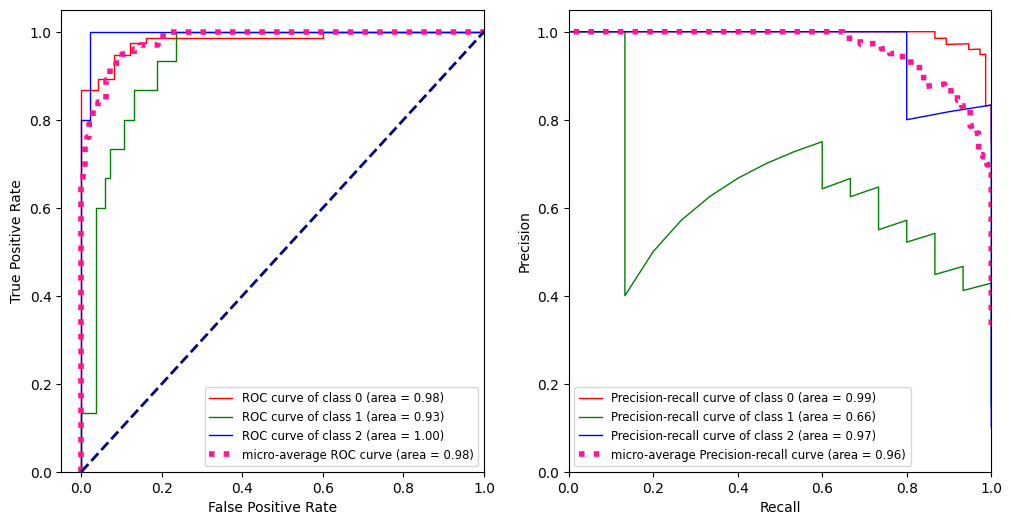

In [63]:
model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'


clf_rfca, y_pred_rfca, y_score_rfca = multiclass_classify(model, clf_rfca, features_extr, params=gs_params, score=gs_score, scale=False)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, prc_rfca, roc_rfca = multiclass_metrics(model, y_test, y_pred_rfca, y_score_rfca, print_out=True, plot_out=True)

In [64]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

Random Forest B  Random Forest A
Accuracy                0.820000         0.840000
macro F1                0.612536         0.661593
micro F1                0.854167         0.857143
macro Precision         0.776749         0.730443
micro Precision         0.891304         0.875000
macro Recall            0.573333         0.640000
micro Recall            0.820000         0.840000
macro ROC AUC           0.964340         0.969290
micro ROC AUC           0.978550         0.980150


Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN B 

Confusion Matrix:
[[75  0  0]
 [10  3  2]
 [ 3  1  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        75
           1       0.75      0.20      0.32        15
           2       0.75      0.60      0.67        10

    accuracy                           0.84       100
   macro avg       0.78      0.60      0.63       100
weighted avg       0.83      0.84      0.80       100


Metrics:
                    KNN B
Accuracy         0.830000
macro F1         0.641710
micro F1         0.855670
macro Precision  0.800813
micro Precision  0.882979
macro Recall     0.595556
micro Recall     0.830000
macro ROC AUC    0.904947
micro ROC AUC    0.954825


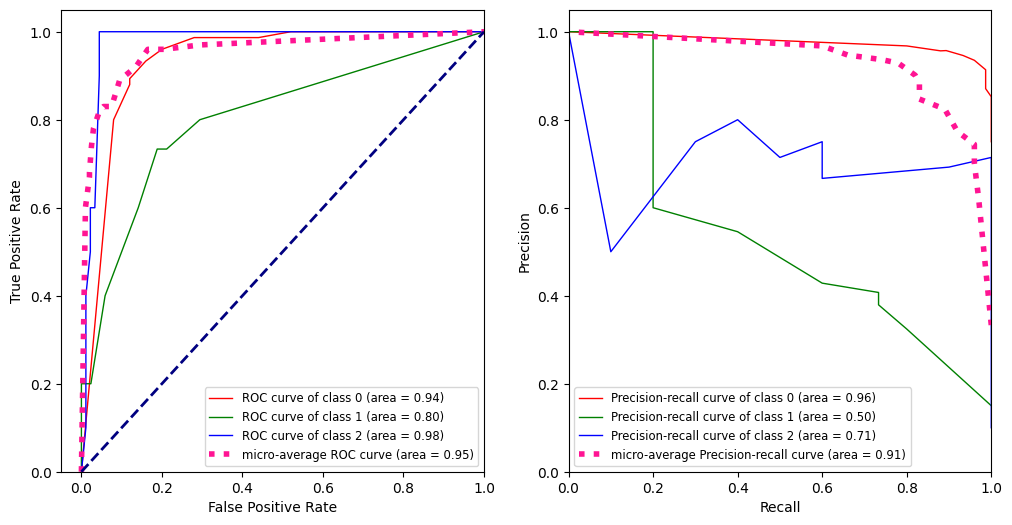

In [65]:
model = 'KNN B'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'


clf_knnb, y_pred_knnb, y_score_knnb = multiclass_classify(model, clf_knnb, features_orig, params=gs_params, score=gs_score, scale=False)
print('\nBest Parameters:\n', clf_knnb)

metrics_knnb, prc_knnb, roc_knnb = multiclass_metrics(model, y_test, y_pred_knnb, y_score_knnb, print_out=True, plot_out=True)


Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN A 

Confusion Matrix:
[[74  1  0]
 [ 9  4  2]
 [ 1  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        75
           1       0.67      0.27      0.38        15
           2       0.80      0.80      0.80        10

    accuracy                           0.86       100
   macro avg       0.78      0.68      0.70       100
weighted avg       0.84      0.86      0.84       100


Metrics:
                    KNN A
Accuracy         0.860000
macro F1         0.709890
micro F1         0.873096
macro Precision  0.793416
micro Precision  0.886598
macro Recall     0.684444
micro Recall     0.860000
macro ROC AUC    0.949892
micro ROC AUC    0.973525


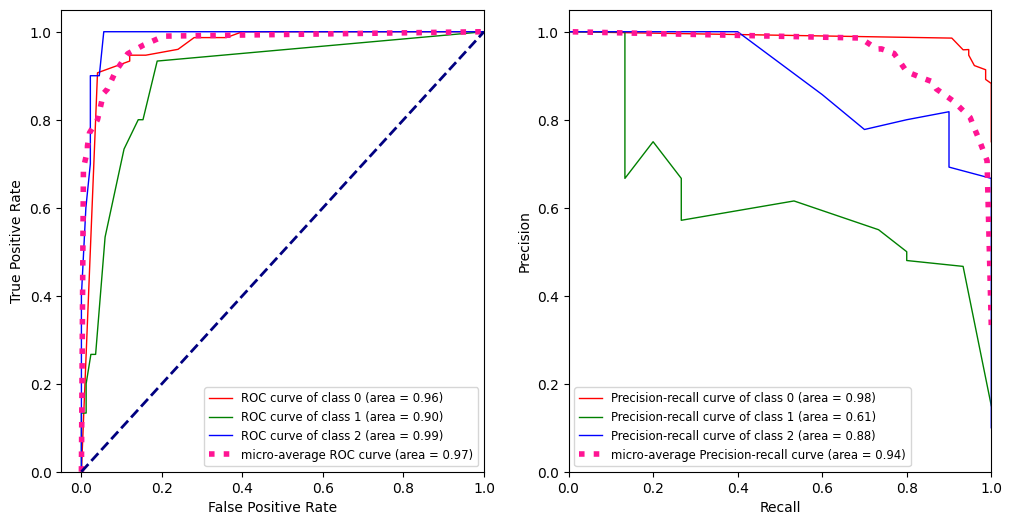

In [66]:
model = 'KNN A'
clf_knna = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'


clf_knna, y_pred_knna, y_score_knna = multiclass_classify(model, clf_knna, features_extr, params=gs_params, score=gs_score, scale=False)
print('\nBest Parameters:\n', clf_knna)

metrics_knna, prc_knna, roc_knna = multiclass_metrics(model, y_test, y_pred_knna, y_score_knna, print_out=True, plot_out=True)

In [67]:
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn

KNN B     KNN A
Accuracy         0.830000  0.860000
macro F1         0.641710  0.709890
micro F1         0.855670  0.873096
macro Precision  0.800813  0.793416
micro Precision  0.882979  0.886598
macro Recall     0.595556  0.684444
micro Recall     0.830000  0.860000
macro ROC AUC    0.904947  0.949892
micro ROC AUC    0.954825  0.973525


Best Parameters:
 OneVsRestClassifier(estimator=GaussianNB())
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[70  5  0]
 [ 1 14  0]
 [ 0 10  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.48      0.93      0.64        15
           2       0.00      0.00      0.00        10

    accuracy                           0.84       100
   macro avg       0.49      0.62      0.53       100
weighted avg       0.81      0.84      0.81       100


Metrics:
                 Gaussian NB B
Accuracy              0.740000
macro F1              0.757853
micro F1              0.852018
macro Precision       0.655592
micro Precision       0.772358
macro Recall          0.977778
micro Recall          0.950000
macro ROC AUC         0.950334
micro ROC AUC         0.962650


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


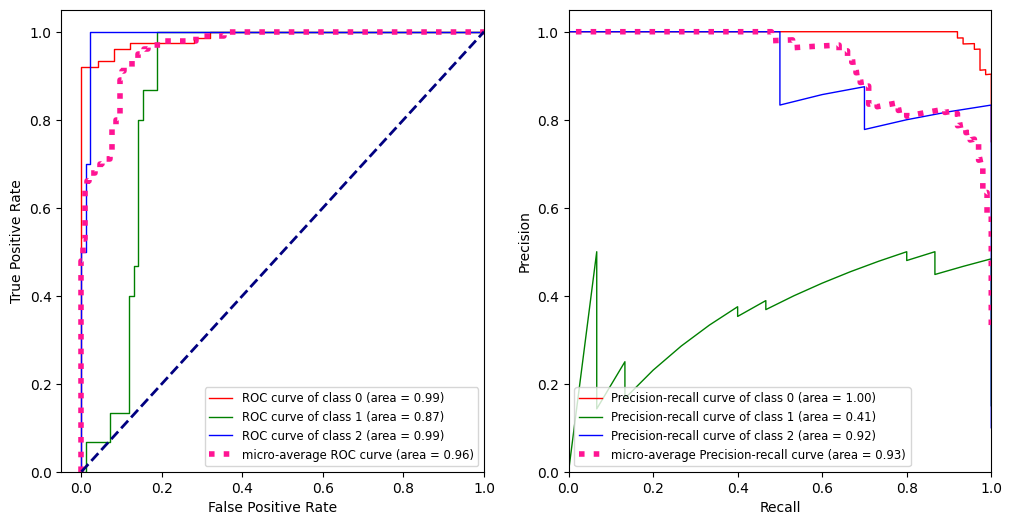

In [68]:
model = 'Gaussian NB B'
clf_gnbb = OneVsRestClassifier(GaussianNB())
gs_params = {}
gs_score = 'roc_auc'


clf_gnbb, y_pred_gnbb, y_score_gnbb = multiclass_classify(model, clf_gnbb, features_orig, params=gs_params, score=gs_score, scale=False, OvR=False)
print('\nBest Parameters:\n', clf_gnbb)

metrics_gnbb, prc_gnbb, roc_gnbb = multiclass_metrics(model, y_test, y_pred_gnbb, y_score_gnbb, print_out=True, plot_out=True)


Best Parameters:
 OneVsRestClassifier(estimator=GaussianNB())
-----------------------------------------------------------
Gaussian NB A 

Confusion Matrix:
[[70  5  0]
 [ 2 13  0]
 [ 0 10  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        75
           1       0.46      0.87      0.60        15
           2       0.00      0.00      0.00        10

    accuracy                           0.83       100
   macro avg       0.48      0.60      0.52       100
weighted avg       0.80      0.83      0.80       100


Metrics:
                 Gaussian NB A
Accuracy              0.740000
macro F1              0.754954
micro F1              0.849315
macro Precision       0.664502
micro Precision       0.781513
macro Recall          0.933333
micro Recall          0.930000
macro ROC AUC         0.944823
micro ROC AUC         0.942850


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


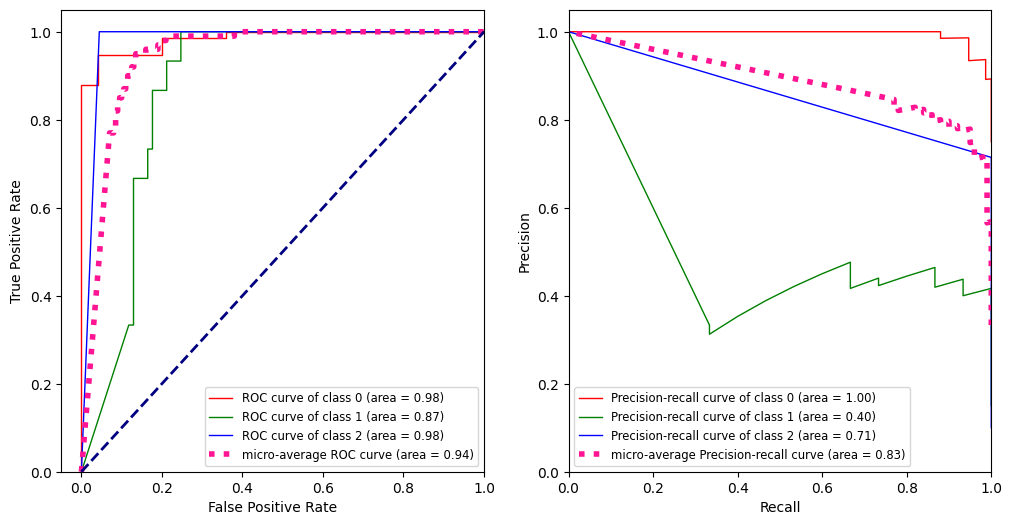

In [69]:
model = 'Gaussian NB A'
clf_gnba = OneVsRestClassifier(GaussianNB())
gs_params = {}
gs_score = 'roc_auc'


clf_gnba, y_pred_gnba, y_score_gnba = multiclass_classify(model, clf_gnba, features_extr, params=gs_params, score=gs_score, scale=False, OvR=False)
print('\nBest Parameters:\n', clf_gnba)

metrics_gnba, prc_gnba, roc_gnba = multiclass_metrics(model, y_test, y_pred_gnba, y_score_gnba, print_out=True, plot_out=True)

In [70]:
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb

Gaussian NB B  Gaussian NB A
Accuracy              0.740000       0.740000
macro F1              0.757853       0.754954
micro F1              0.852018       0.849315
macro Precision       0.655592       0.664502
micro Precision       0.772358       0.781513
macro Recall          0.977778       0.933333
micro Recall          0.950000       0.930000
macro ROC AUC         0.950334       0.944823
micro ROC AUC         0.962650       0.942850

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Parameters:
 MLPClassifier(alpha=0.01, random_state=123)
-----------------------------------------------------------
Neural Net MLP B 

Confusion Matrix:
[[74  1  0]
 [ 7  8  0]
 [ 2  1  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        75
           1       0.80      0.53      0.64        15
           2       1.00      0.70      0.82        10

    accuracy                           0.89       100
   macro avg       0.90      0.74      0.80       100
weighted avg       0.89      0.89      0.88       100


Metrics:
                 Neural Net MLP B
Accuracy                 0.880000
macro F1                 0.788832
micro F1                 0.894472
macro Precision          0.862860
micro Precision          0.898990
macro Recall             0.740000
micro Recall             0.890000
macro ROC AUC            0.971816
micro ROC AUC            0.982550


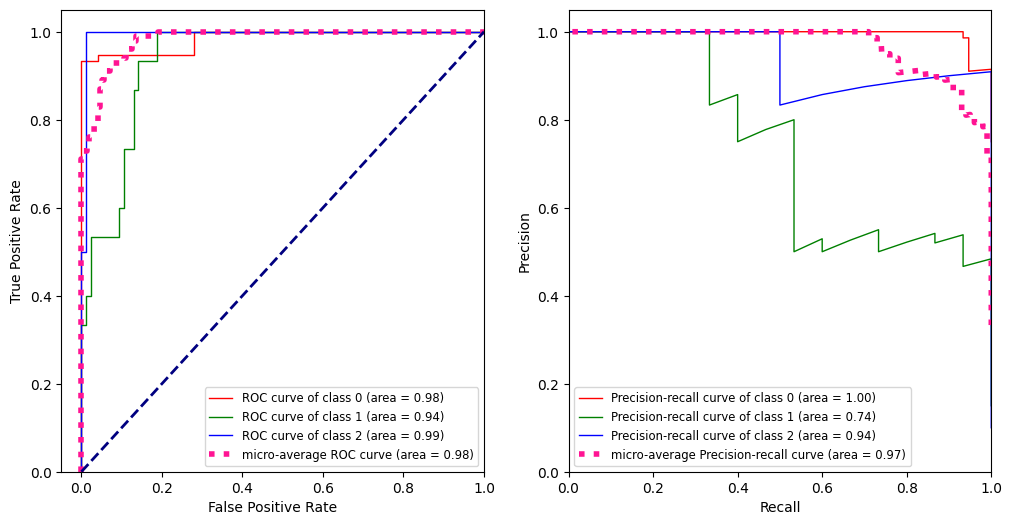

In [71]:
model = 'Neural Net MLP B'
clf_nncb = MLPClassifier(solver='adam', random_state=123)
gs_params = {'alpha': [0.001, 0.01], 'hidden_layer_sizes': [(100,), (100,100)]}
gs_score = 'roc_auc'


clf_nncb, y_pred_nncb, y_score_nncb = multiclass_classify(model, clf_nncb, features_orig, params=gs_params, score=gs_score, scale=True, OvR=False)
print('\nBest Parameters:\n',clf_nncb)

metrics_nncb, prc_nncb, roc_nncb = multiclass_metrics(model, y_test, y_pred_nncb, y_score_nncb, print_out=True, plot_out=True)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Parameters:
 MLPClassifier(alpha=0.01, random_state=123)
-----------------------------------------------------------
Neural Net MLP A 

Confusion Matrix:
[[75  0  0]
 [10  3  2]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        75
           1       0.75      0.20      0.32        15
           2       0.82      0.90      0.86        10

    accuracy                           0.87       100
   macro avg       0.82      0.70      0.70       100
weighted avg       0.86      0.87      0.84       100


Metrics:
                 Neural Net MLP A
Accuracy                 0.870000
macro F1                 0.735503
micro F1                 0.884422
macro Precision          0.840599
micro Precision          0.888889
macro Recall             0.722222
micro Recall             0.880000
macro ROC AUC            0.971289
micro ROC AUC            0.980700


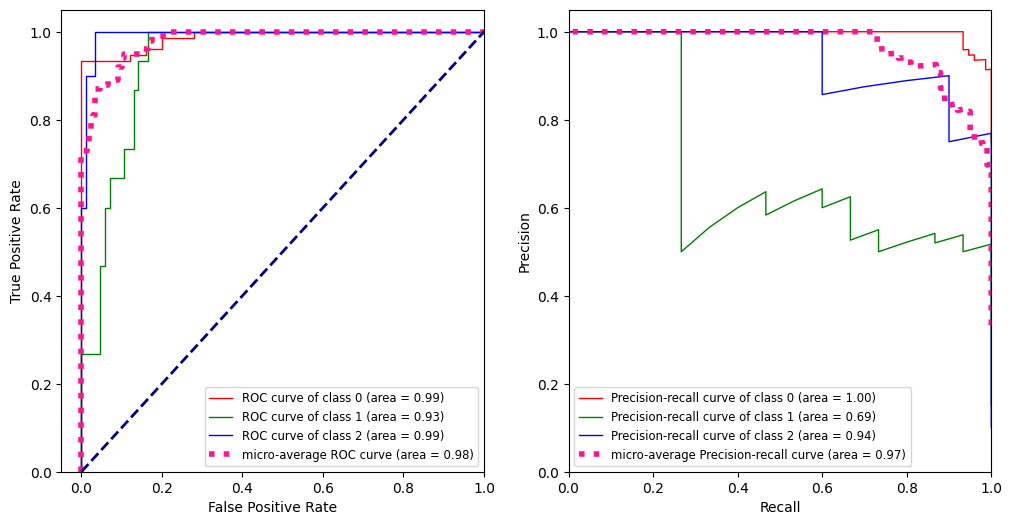

In [72]:
model = 'Neural Net MLP A'
clf_nnca = MLPClassifier(solver='adam', random_state=123)
gs_params = {'alpha': [0.001, 0.01], 'hidden_layer_sizes': [(100,), (100,100)]}
gs_score = 'roc_auc'


clf_nnca, y_pred_nnca, y_score_nnca = multiclass_classify(model, clf_nnca, features_extr, params=gs_params, score=gs_score, scale=True, OvR=False)
print('\nBest Parameters:\n',clf_nnca)

metrics_nnca, prc_nnca, roc_nnca = multiclass_metrics(model, y_test, y_pred_nnca, y_score_nnca, print_out=True, plot_out=True)

In [73]:
metrics_nnc = pd.concat([metrics_nncb, metrics_nnca], axis=1)
metrics_nnc

Neural Net MLP B  Neural Net MLP A
Accuracy                 0.880000          0.870000
macro F1                 0.788832          0.735503
micro F1                 0.894472          0.884422
macro Precision          0.862860          0.840599
micro Precision          0.898990          0.888889
macro Recall             0.740000          0.722222
micro Recall             0.890000          0.880000
macro ROC AUC            0.971816          0.971289
micro ROC AUC            0.982550          0.980700

In [74]:
#compare all models
metrics_mc = pd.concat([metrics_lgr, metrics_dtr, metrics_rfc, metrics_svl, metrics_knn, metrics_gnb, metrics_nnc], axis=1).T
metrics_mc

Accuracy  macro F1  micro F1  macro Precision  \
Logistic Regression B      0.80  0.530556  0.829016         0.540196   
Logistic Regression A      0.81  0.551750  0.852632         0.586919   
Decision Tree B            0.84  0.684053  0.861538         0.818970   
Decision Tree A            0.84  0.607906  0.857143         0.852146   
Random Forest B            0.82  0.612536  0.854167         0.776749   
Random Forest A            0.84  0.661593  0.857143         0.730443   
SVC Linear B               0.80  0.532495  0.833333         0.543651   
SVC Linear A               0.82  0.575715  0.858639         0.592871   
KNN B                      0.83  0.641710  0.855670         0.800813   
KNN A                      0.86  0.709890  0.873096         0.793416   
Gaussian NB B              0.74  0.757853  0.852018         0.655592   
Gaussian NB A              0.74  0.754954  0.849315         0.664502   
Neural Net MLP B           0.88  0.788832  0.894472         0.862860   
Neural Net MLP A           0.87  0.735503  0.884422         0.840599   

                       micro Precision  macro Recall  micro Recall  \
Logistic Regression B         0.860215      0.528889          0.80   
Logistic Regression A         0.900000      0.533333          0.81   
Decision Tree B               0.884211      0.668889          0.84   
Decision Tree A               0.875000      0.651111          0.84   
Random Forest B               0.891304      0.573333          0.82   
Random Forest A               0.875000      0.640000          0.84   
SVC Linear B                  0.869565      0.528889          0.80   
SVC Linear A                  0.901099      0.566667          0.82   
KNN B                         0.882979      0.595556          0.83   
KNN A                         0.886598      0.684444          0.86   
Gaussian NB B                 0.772358      0.977778          0.95   
Gaussian NB A                 0.781513      0.933333          0.93   
Neural Net MLP B              0.898990      0.740000          0.89   
Neural Net MLP A              0.888889      0.722222          0.88   

                       macro ROC AUC  micro ROC AUC  
Logistic Regression B       0.942057       0.969450  
Logistic Regression A       0.941840       0.970250  
Decision Tree B             0.905594       0.956625  
Decision Tree A             0.949857       0.973550  
Random Forest B             0.964340       0.978550  
Random Forest A             0.969290       0.980150  
SVC Linear B                0.940285       0.965400  
SVC Linear A                0.943779       0.969150  
KNN B                       0.904947       0.954825  
KNN A                       0.949892       0.973525  
Gaussian NB B               0.950334       0.962650  
Gaussian NB A               0.944823       0.942850  
Neural Net MLP B            0.971816       0.982550  
Neural Net MLP A            0.971289       0.980700

Text(0.5, 1.0, 'micro Precision Recall')

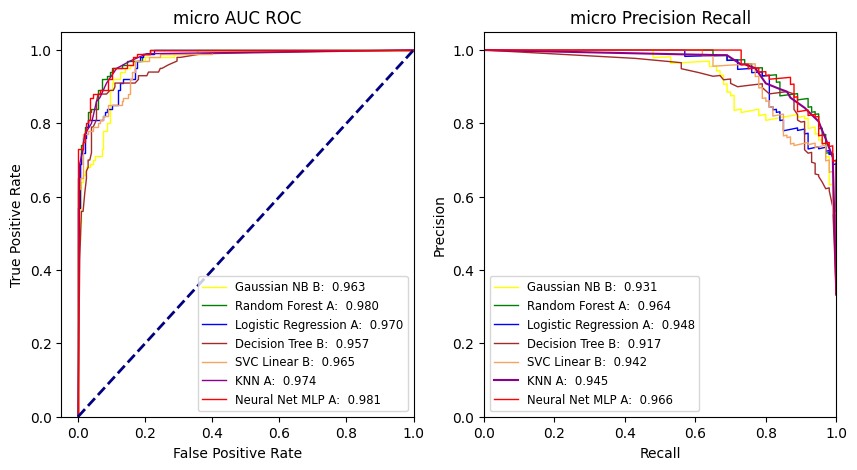

In [75]:
# Plot AUC-ROC and precision-recall curves for best models

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_gnbb.FPR['micro'], roc_gnbb.TPR['micro'], color='yellow', lw=1, label= roc_gnbb.Model['micro'] + ':  %.3f' % roc_gnbb.AUC['micro'])
ax1.plot(roc_rfca.FPR['micro'], roc_rfca.TPR['micro'], color='green', lw=1, label= roc_rfca.Model['micro'] + ':  %.3f' % roc_rfca.AUC['micro'])
ax1.plot(roc_lgra.FPR['micro'], roc_lgra.TPR['micro'], color='blue', lw=1, label= roc_lgra.Model['micro'] + ':  %.3f' % roc_lgra.AUC['micro'])
ax1.plot(roc_dtrb.FPR['micro'], roc_dtrb.TPR['micro'], color='brown', lw=1, label= roc_dtrb.Model['micro'] + ':  %.3f' % roc_dtrb.AUC['micro'])
ax1.plot(roc_svlb.FPR['micro'], roc_svlb.TPR['micro'], color='sandybrown', lw=1, label= roc_svlb.Model['micro'] + ':  %.3f' % roc_svlb.AUC['micro'])
ax1.plot(roc_knna.FPR['micro'], roc_knna.TPR['micro'], color='darkmagenta', lw=1, label= roc_knna.Model['micro'] + ':  %.3f' % roc_knna.AUC['micro'])
ax1.plot(roc_nnca.FPR['micro'], roc_nnca.TPR['micro'], color='red', lw=1, label= roc_nnca.Model['micro'] + ':  %.3f' % roc_nnca.AUC['micro'])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('micro AUC ROC')

ax2.plot(prc_gnbb.Recall['micro'], prc_gnbb.Precision['micro'], color='yellow', lw=1, label= prc_gnbb.Model['micro'] + ':  %.3f' % prc_gnbb['Avg Precision']['micro'])
ax2.plot(prc_rfca.Recall['micro'], prc_rfca.Precision['micro'], color='green', lw=1, label= prc_rfca.Model['micro'] + ':  %.3f' % prc_rfca['Avg Precision']['micro'])
ax2.plot(prc_lgra.Recall['micro'], prc_lgra.Precision['micro'], color='blue', lw=1, label= prc_lgra.Model['micro'] + ':  %.3f' % prc_lgra['Avg Precision']['micro'])
ax2.plot(prc_dtrb.Recall['micro'], prc_dtrb.Precision['micro'], color='brown', lw=1, label= prc_dtrb.Model['micro'] + ':  %.3f' % prc_dtrb['Avg Precision']['micro'])
ax2.plot(prc_svlb.Recall['micro'], prc_svlb.Precision['micro'], color='sandybrown', lw=1, label= prc_svlb.Model['micro'] + ':  %.3f' % prc_svlb['Avg Precision']['micro'])
ax2.plot(prc_knna.Recall['micro'], prc_knna.Precision['micro'], color='darkmagenta', label= prc_knna.Model['micro'] + ':  %.3f' % prc_knna['Avg Precision']['micro'])
ax2.plot(prc_nnca.Recall['micro'], prc_nnca.Precision['micro'], color='red', lw=1, label= prc_nnca.Model['micro'] + ':  %.3f' % prc_nnca['Avg Precision']['micro'])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('micro Precision Recall')

Neural Net Multi-layer Perceptron classifier clearly outperformed other models in all metrics, with the Random Forests classifier scoring in the second place.

# Regression

In [76]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# a variable to hold the set of features to experiment with
features = features_orig


X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

In [77]:
def get_regression_metrics(model, actual, predicted):

    """Calculate main regression metrics.

    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values

    Returns:
        dataframe: The combined metrics in single dataframe


    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [78]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):

    """Plot regression coefficients weights or feature importance.

    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'

    Returns:
        plot of either regression coefficients weights or feature importance


    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None


In [79]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):

    """Print the regression residuals.

    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data

    Returns:
        Plot of regression residuals

    """

    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [80]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


Linear Regression
Root Mean Squared Error          32.041095
Mean Absolute Error              25.591780
R^2                               0.405495
Explained Variance                0.665297

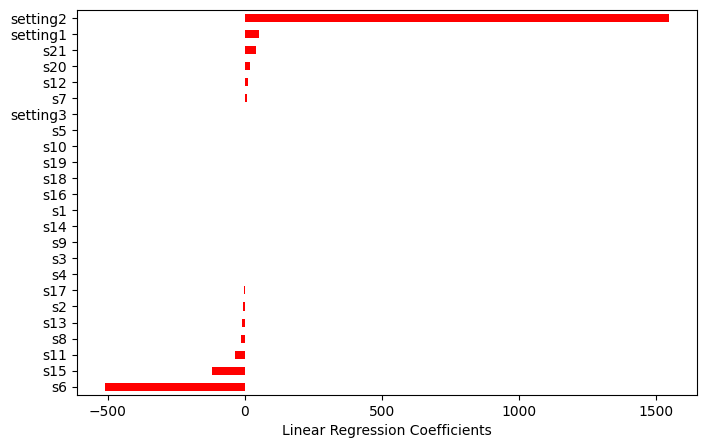

In [81]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

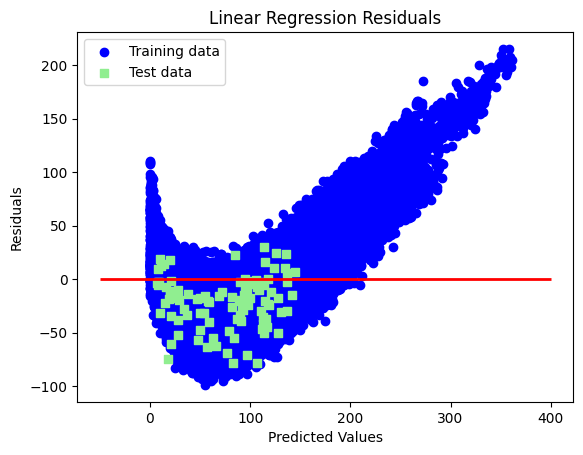

In [82]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

In [83]:

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.579, R^2 test: 0.408


LASSO
Root Mean Squared Error  31.966099
Mean Absolute Error      25.551808
R^2                       0.408275
Explained Variance        0.668206

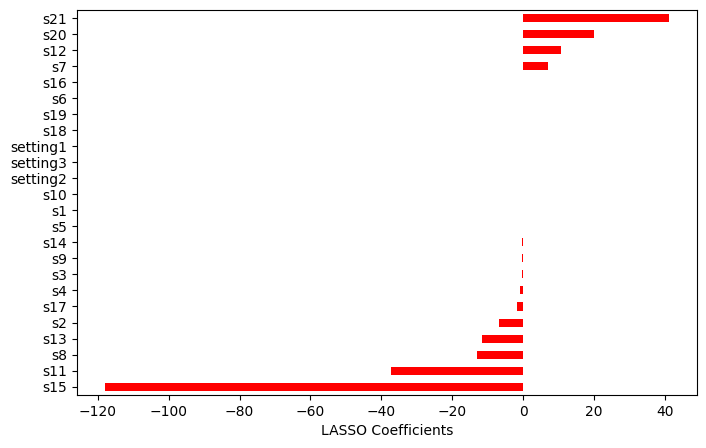

In [84]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')

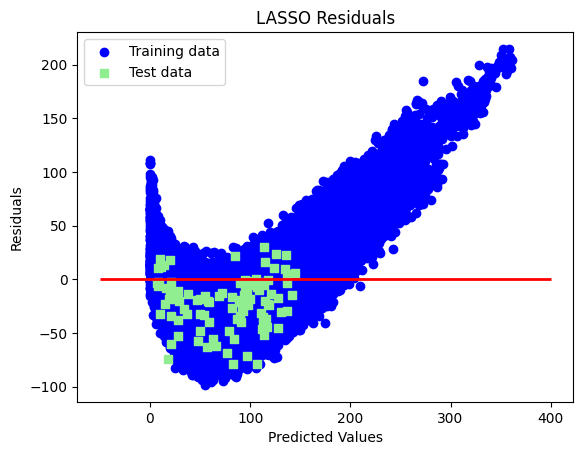

In [85]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

In [86]:
rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.580, R^2 test: 0.408


Ridge Regression
Root Mean Squared Error         31.965740
Mean Absolute Error             25.544620
R^2                              0.408289
Explained Variance               0.667607

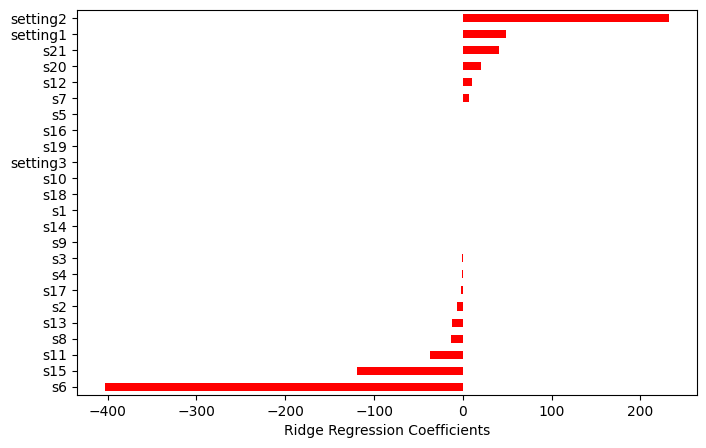

In [87]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

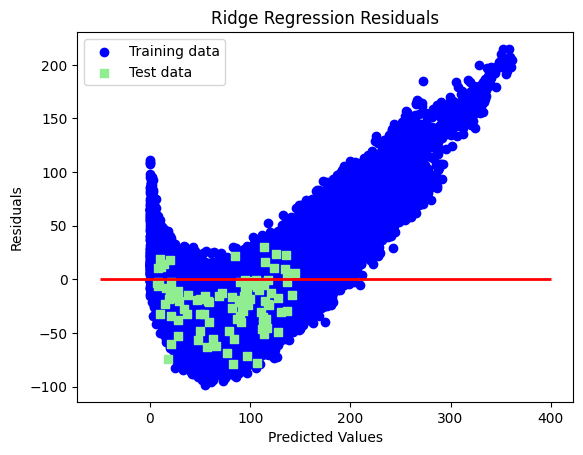

In [88]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.627, R^2 test: 0.427


Polynomial Regression
Root Mean Squared Error              31.465414
Mean Absolute Error                  23.976765
R^2                                   0.426666
Explained Variance                    0.640758

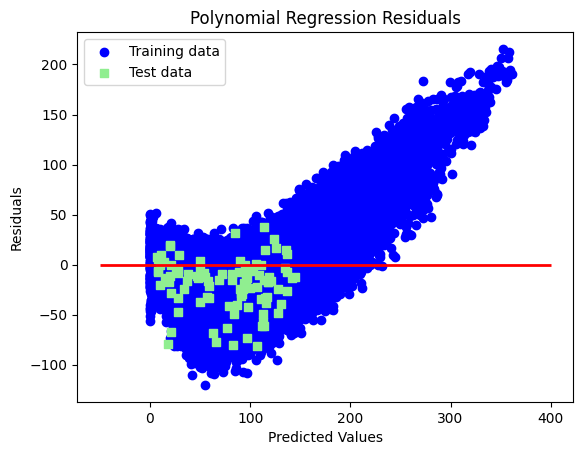

In [90]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

In [91]:
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
dtrg_metrics

R^2 training: 0.625, R^2 test: 0.403


Decision Tree Regression
Root Mean Squared Error                 32.095349
Mean Absolute Error                     24.319068
R^2                                      0.403480
Explained Variance                       0.632767

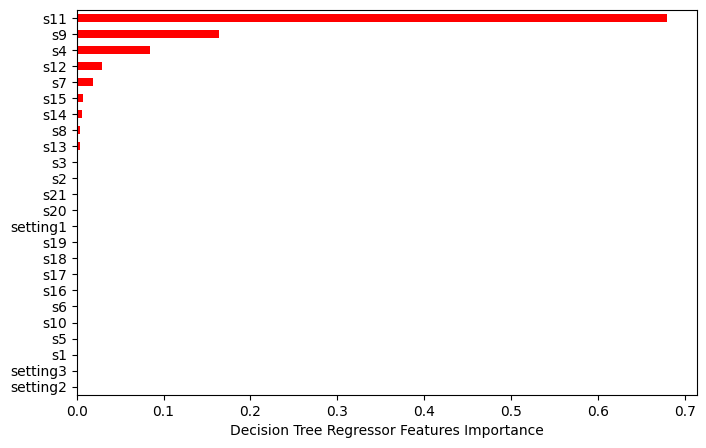

In [92]:
plot_features_weights('Decision Tree Regressor', dtrg.feature_importances_, X_train.columns, 't' )

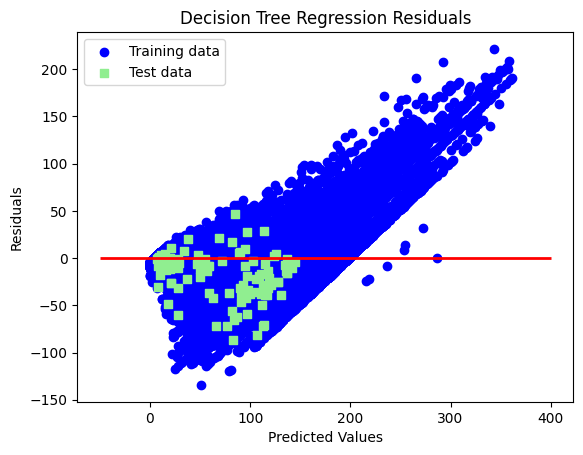

In [93]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)

In [97]:
kfold = model_selection.KFold(n_splits=5)

dtrg = DecisionTreeRegressor(max_depth=7)

rfecv = RFECV(estimator=dtrg, step=1, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

sel_features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
print('The selected features are: {}'.format(sel_features))

Optimal number of features : 5
The selected features are: ['s4', 's7', 's9', 's11', 's12']


In [98]:
X_train_trn = rfecv.transform(X_train)
X_test_trn = rfecv.transform(X_test)

print(X_train.shape)

dtrg = DecisionTreeRegressor(max_depth=7)

dtrg.fit(X_train_trn, y_train)

y_test_predict = dtrg.predict(X_test_trn)

dtrg_fs_metrics = get_regression_metrics('Decision Tree: Selected Features', y_test, y_test_predict)

#combine decision tree results: All features and selected features
dtr_metrics = pd.concat([dtrg_fs_metrics,dtrg_metrics], axis=1)

dtr_metrics

(20631, 24)


Decision Tree: Selected Features  \
Root Mean Squared Error                         34.212392   
Mean Absolute Error                             25.866117   
R^2                                              0.322191   
Explained Variance                               0.593892   

                         Decision Tree Regression  
Root Mean Squared Error                 32.095349  
Mean Absolute Error                     24.319068  
R^2                                      0.403480  
Explained Variance                       0.632767

In [99]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(sel_features, dtrg.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

importances.sort_values(by='Importance', ascending=False)

Importance
s11    0.682967
s9     0.168858
s4     0.091236
s12    0.033993
s7     0.022947

In [100]:
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1)

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.594, R^2 test: 0.525


Random Forest Regression
Root Mean Squared Error                 28.634253
Mean Absolute Error                     23.167130
R^2                                      0.525198
Explained Variance                       0.767320

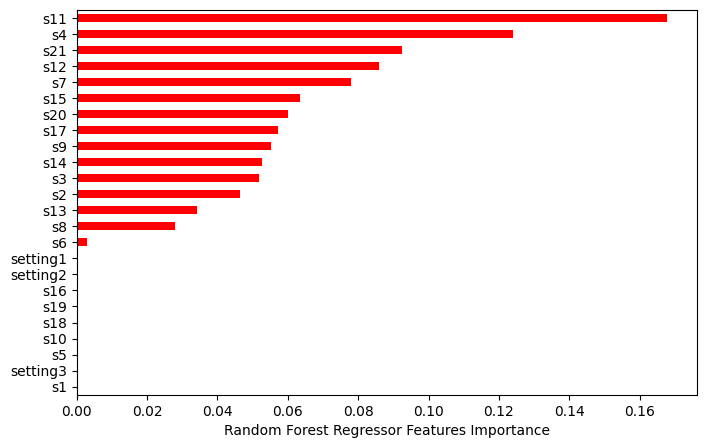

In [101]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )

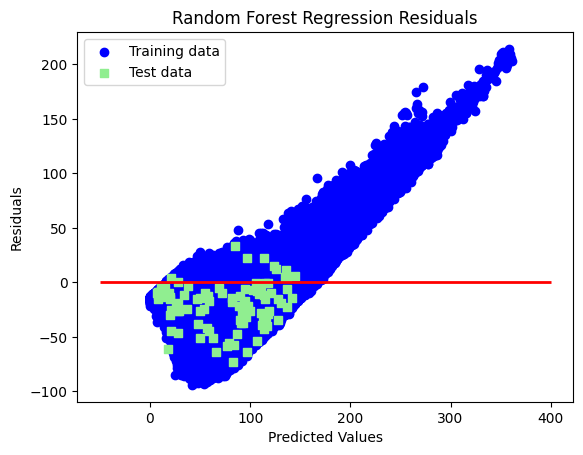

In [102]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

In [103]:
rf_pred_dict = {
                'Actual' : y_test,
                'Prediction' : y_test_predict
            }

rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

0           1          2          3          4   \
Actual      112.000000   98.000000  69.000000  82.000000   91.00000   
Prediction  151.578408  119.268513  74.415647  96.470907  112.59338   

                    5           6           7          8           9   ...  \
Actual       93.000000   91.000000   95.000000  111.00000   96.000000  ...   
Prediction  130.279445  128.114019  100.692144  116.11839  127.369752  ...   

                   90         91        92         93          94          95  \
Actual      38.000000  20.000000  85.00000  55.000000  128.000000  137.000000   
Prediction  40.976045  33.031218  51.39622  64.318328  143.657061  159.663783   

                    96          97          98        99  
Actual       82.000000   59.000000  117.000000  20.00000  
Prediction  100.027659  103.182456  157.063688  35.62655  

[2 rows x 100 columns]

In [104]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

Linear Regression      LASSO  Ridge Regression  \
Root Mean Squared Error          32.041095  31.966099         31.965740   
Mean Absolute Error              25.591780  25.551808         25.544620   
R^2                               0.405495   0.408275          0.408289   
Explained Variance                0.665297   0.668206          0.667607   

                         Decision Tree Regression  Polynomial Regression  \
Root Mean Squared Error                 32.095349              31.465414   
Mean Absolute Error                     24.319068              23.976765   
R^2                                      0.403480               0.426666   
Explained Variance                       0.632767               0.640758   

                         Random Forest Regression  
Root Mean Squared Error                 28.634253  
Mean Absolute Error                     23.167130  
R^2                                      0.525198  
Explained Variance                       0.767320

 Random Forest clearly outperformed other models scoring RMSE of 28.63 cycles, i.e. the model predicts TTF within average error range of ±28.63 cycles.